In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-darkgrid')

In [3]:
amzn = pd.read_csv('/kaggle/input/amazon/AMZN.csv')
ibm = pd.read_csv('/kaggle/input/stocks-ohlc/IBM.csv')
msft = pd.read_csv('/kaggle/input/stocks-ohlc/MSFT.csv')

In [4]:
amzn.head()

Date      Open      High       Low     Close  Adj Close    Volume
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200

In [5]:
ibm.head()

Date      Open      High       Low     Close  Adj Close  Volume
0  1962-01-02  7.713333  7.713333  7.626667  7.626667   0.618153  387200
1  1962-01-03  7.626667  7.693333  7.626667  7.693333   0.623556  288000
2  1962-01-04  7.693333  7.693333  7.613333  7.616667   0.617343  256000
3  1962-01-05  7.606667  7.606667  7.453333  7.466667   0.605185  363200
4  1962-01-08  7.460000  7.460000  7.266667  7.326667   0.593837  544000

In [6]:
msft.head()

Date      Open      High       Low     Close  Adj Close      Volume
0  1986-03-13  0.088542  0.101562  0.088542  0.097222   0.062378  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   0.064606   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   0.065720   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826   0.064049    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090   0.062935    47894400

In [7]:
amzn['Company'] = 'Amazon'
ibm['Company'] = 'IBM'
msft['Company'] = 'Microsoft'

In [8]:
print(amzn.shape, ibm.shape, msft.shape)

(5758, 8) (14663, 8) (8584, 8)


In [9]:
import math
import datetime as dt

In [10]:
stock = pd.concat([amzn, ibm, msft], axis=0)
stock.head()

Date      Open      High       Low     Close  Adj Close    Volume  \
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

  Company  
0  Amazon  
1  Amazon  
2  Amazon  
3  Amazon  
4  Amazon

In [11]:
# convert date field from string to Date format
stock['Date'] = pd.to_datetime(stock['Date'])
stock.head()

Date      Open      High       Low     Close  Adj Close    Volume  \
0 1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1 1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2 1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3 1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
4 1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

  Company  
0  Amazon  
1  Amazon  
2  Amazon  
3  Amazon  
4  Amazon

In [12]:
stock.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Company              object
dtype: object

# EDA

In [204]:
stock.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

In [205]:
stock.shape

(29005, 8)

In [206]:
stock.describe().style.set_properties(**{
    "background-color": "aqua",
    "color": "#000000",
    "border": "1.5px solid #5f0d11"
})

In [207]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29005 entries, 0 to 8583
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       29005 non-null  datetime64[ns]
 1   Open       29005 non-null  float64       
 2   High       29005 non-null  float64       
 3   Low        29005 non-null  float64       
 4   Close      29005 non-null  float64       
 5   Adj Close  29005 non-null  float64       
 6   Volume     29005 non-null  int64         
 7   Company    29005 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.0+ MB


In [208]:
stock.columns.values

array(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'], dtype=object)

# Date Range

In [209]:
print("Starting date: ",stock.iloc[0][0])
print("Ending date: ", stock.iloc[-1][0])
print("Duration: ", stock.iloc[-1][0]-stock.iloc[0][0])

Starting date:  1997-05-15 00:00:00
Ending date:  2020-04-01 00:00:00
Duration:  8357 days 00:00:00


In [13]:
stock.set_index('Date', inplace=True)

In [14]:
stock.head()

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

           Company  
Date                
1997-05-15  Amazon  
1997-05-16  Amazon  
1997-05-19  Amazon  
1997-05-20  Amazon  
1997-05-21  Amazon

In [212]:
stock.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
dtype: int64

# Time Series Analysis Candle Chart

In [213]:
pip install plotly mplfinance

Note: you may need to restart the kernel to use updated packages.


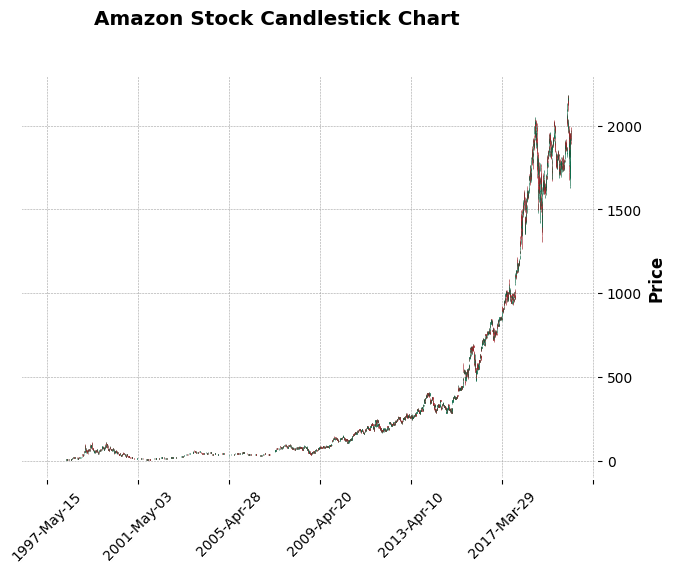

In [214]:
import mplfinance as mpf
import pandas as pd

# Sample data - replace with actual stock data
stock_data = stock[stock['Company'] == 'Amazon']  # Filter data for Amazon, for example

# Prepare the data in the format required by mplfinance
stock_data = stock_data[['Open', 'High', 'Low', 'Close']]  # Only these columns are needed
stock_data.index = pd.to_datetime(stock_data.index)  # Ensure the index is in datetime format

# Plot candlestick chart
mpf.plot(stock_data, type='candlestick', style='charles', title='Amazon Stock Candlestick Chart', ylabel='Price')

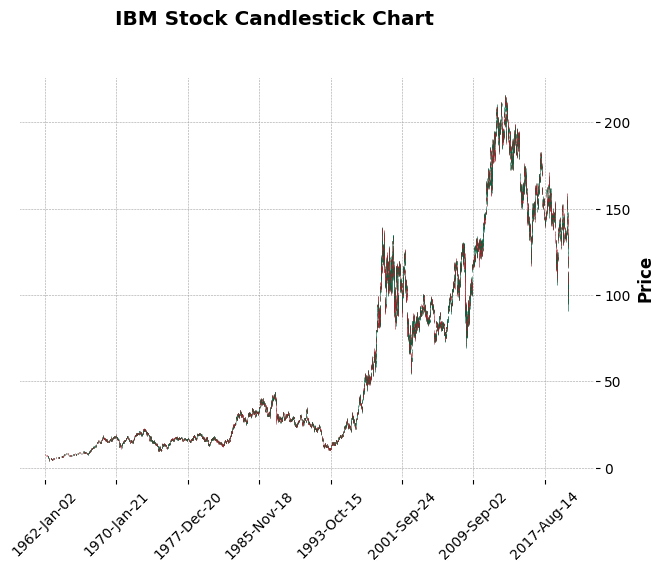

In [215]:
import mplfinance as mpf
import pandas as pd

# Sample data - replace with actual stock data
stock_data = stock[stock['Company'] == 'IBM']  # Filter data for Amazon, for example

# Prepare the data in the format required by mplfinance
stock_data = stock_data[['Open', 'High', 'Low', 'Close']]  # Only these columns are needed
stock_data.index = pd.to_datetime(stock_data.index)  # Ensure the index is in datetime format

# Plot candlestick chart
mpf.plot(stock_data, type='candlestick', style='charles', title='IBM Stock Candlestick Chart', ylabel='Price')


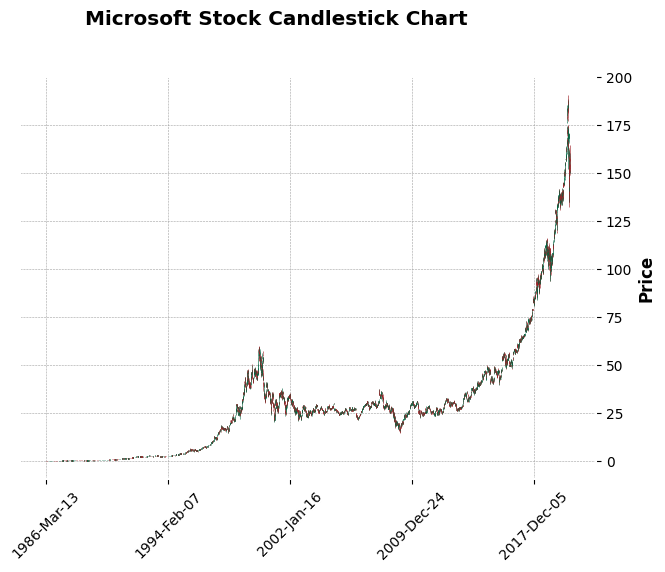

In [216]:
import mplfinance as mpf
import pandas as pd

# Sample data - replace with actual stock data
stock_data = stock[stock['Company'] == 'Microsoft']  # Filter data for Amazon, for example

# Prepare the data in the format required by mplfinance
stock_data = stock_data[['Open', 'High', 'Low', 'Close']]  # Only these columns are needed
stock_data.index = pd.to_datetime(stock_data.index)  # Ensure the index is in datetime format

# Plot candlestick chart
mpf.plot(stock_data, type='candlestick', style='charles', title='Microsoft Stock Candlestick Chart', ylabel='Price')


# Price Trends Over Time

Track how stock prices evolve over time for each company. Date vs. Close for tracking the closing price over time.

In [15]:
companies = ['Amazon', 'IBM', 'Microsoft']

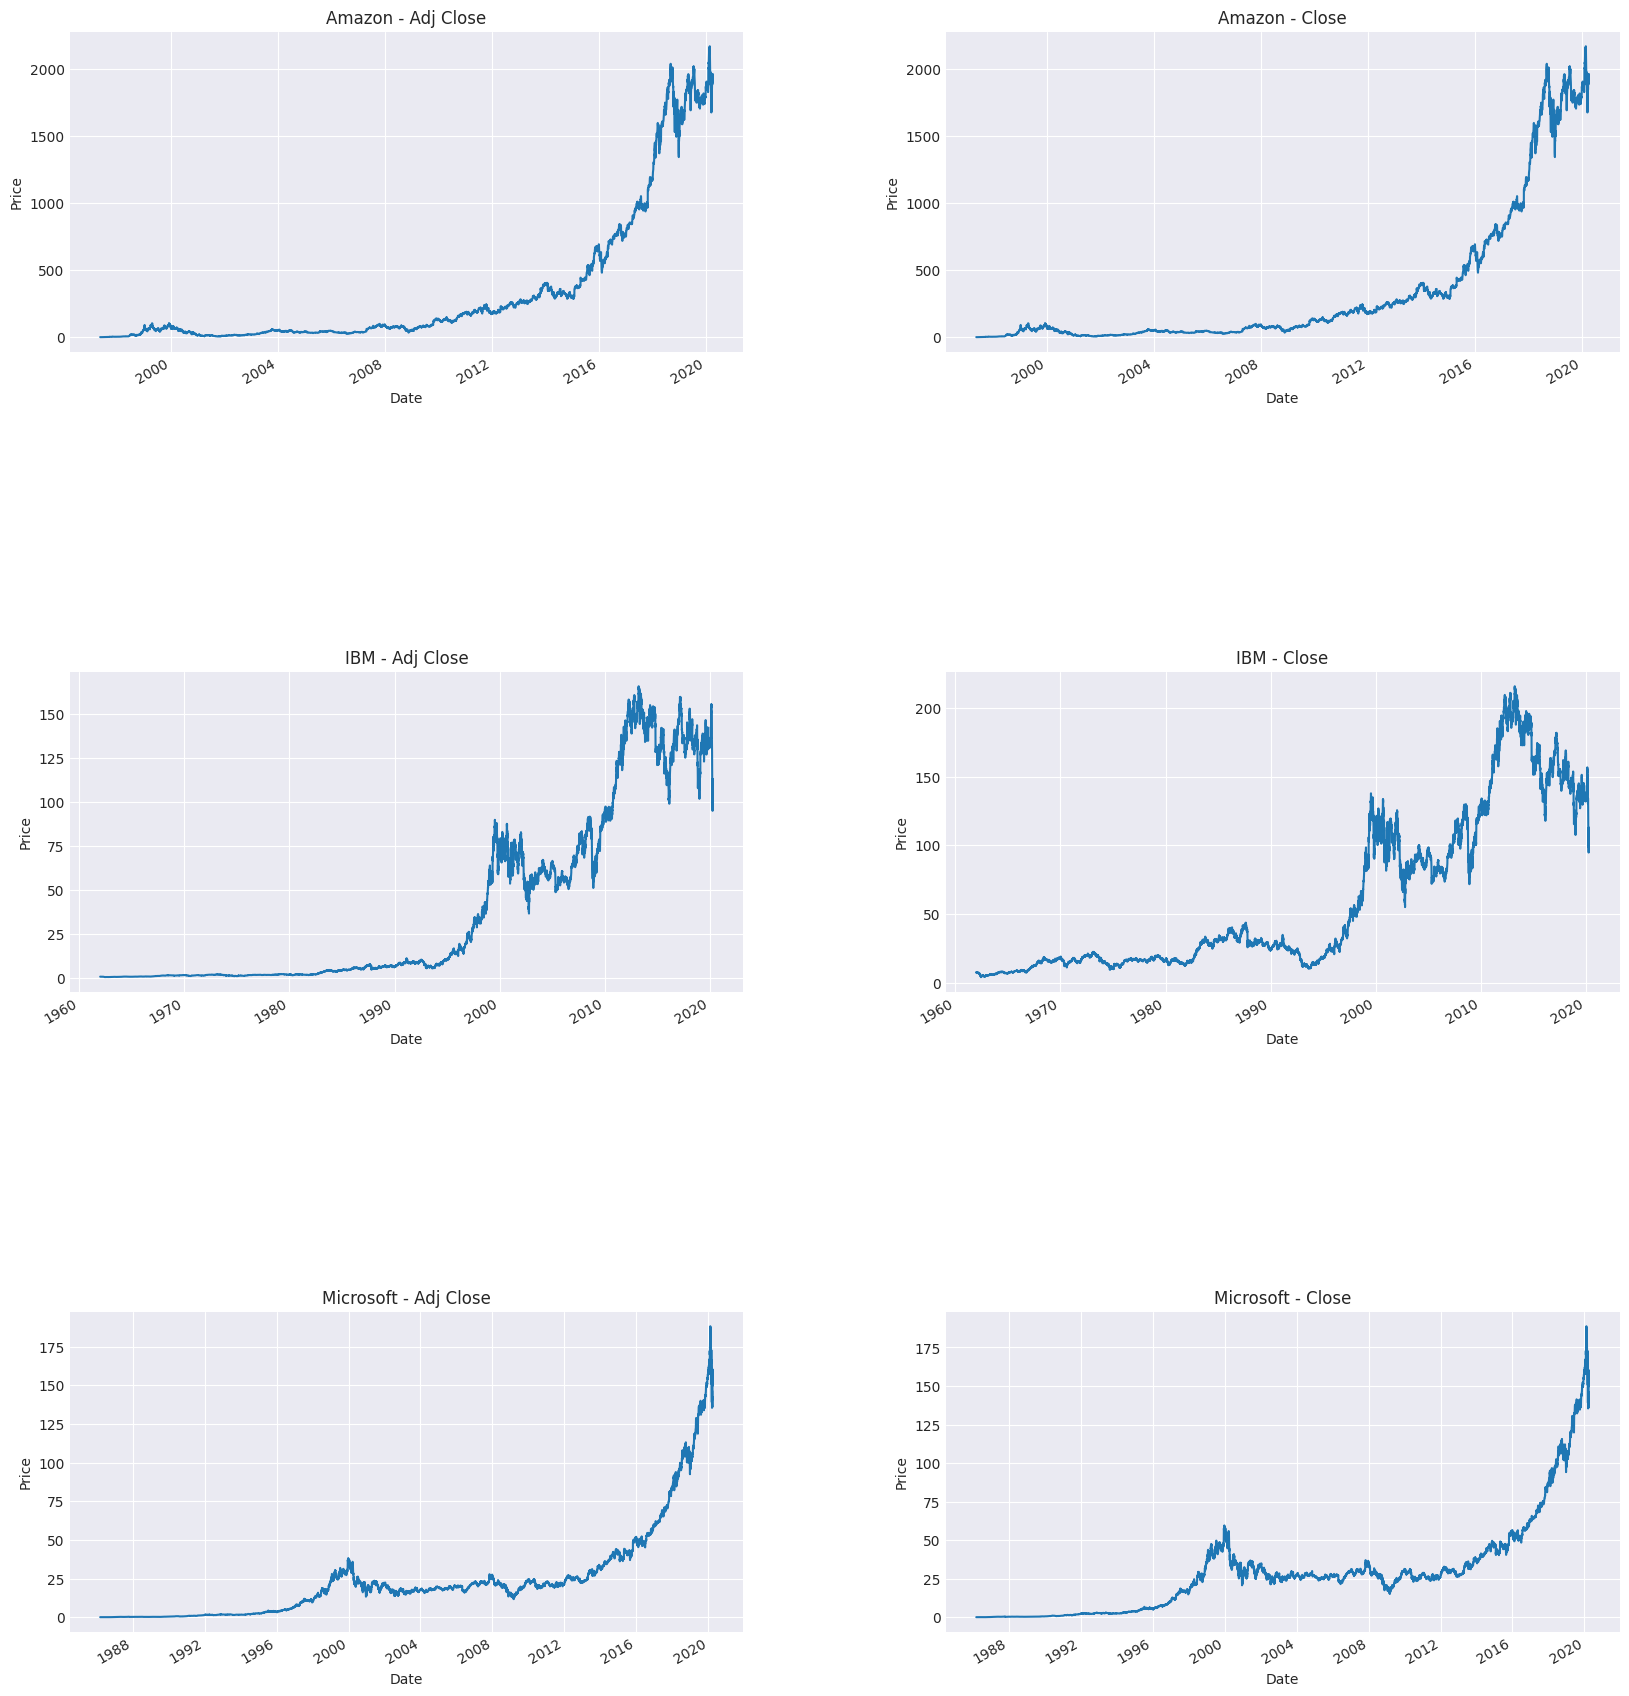

In [16]:
# Set up the plotting figure
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=1, wspace=0.3, top=1, bottom=0.1)

# Iterate over the companies and plot their adjusted closing prices

for i, company in enumerate(companies, 1):   # 1 means index start with 1 instead of 0

    # Filter the data for the current company
    company_data = stock[stock['Company'] == company]

    # Create subplot for each company
    #3x2 grid --------

    # Plot for Adjusted Close price--------indexing 2 * i - 1
    plt.subplot(3, 2, 2 * i - 1)

    company_data['Adj Close'].plot()
    plt.title(f'{company} - Adj Close')
    plt.ylabel('Price')
    plt.xlabel('Date')

    # Plot for Close price---------------indexing 2 * i
    plt.subplot(3, 2, 2 * i)

    company_data['Close'].plot()
    plt.title(f'{company} - Close')
    plt.ylabel('Price')
    plt.xlabel('Date')

# Adjust layout and show the plot
plt.show()

# Price Volatility

Volatility helps assess the risk of an asset and is important for investors making buy/sell decisions.

**High vs. Low** gives the daily price range (a measure of volatility) 

**Close vs. Open** can help measure price movement within the trading day

**Rolling volatility** (or moving standard deviation) measures the degree of variation or dispersion of stock returns over a fixed window of time. It helps track how risky or stable a stock has been over time.
time.

### Daily Price Range (High vs. Low)
This measures how much the price fluctuated during the day.

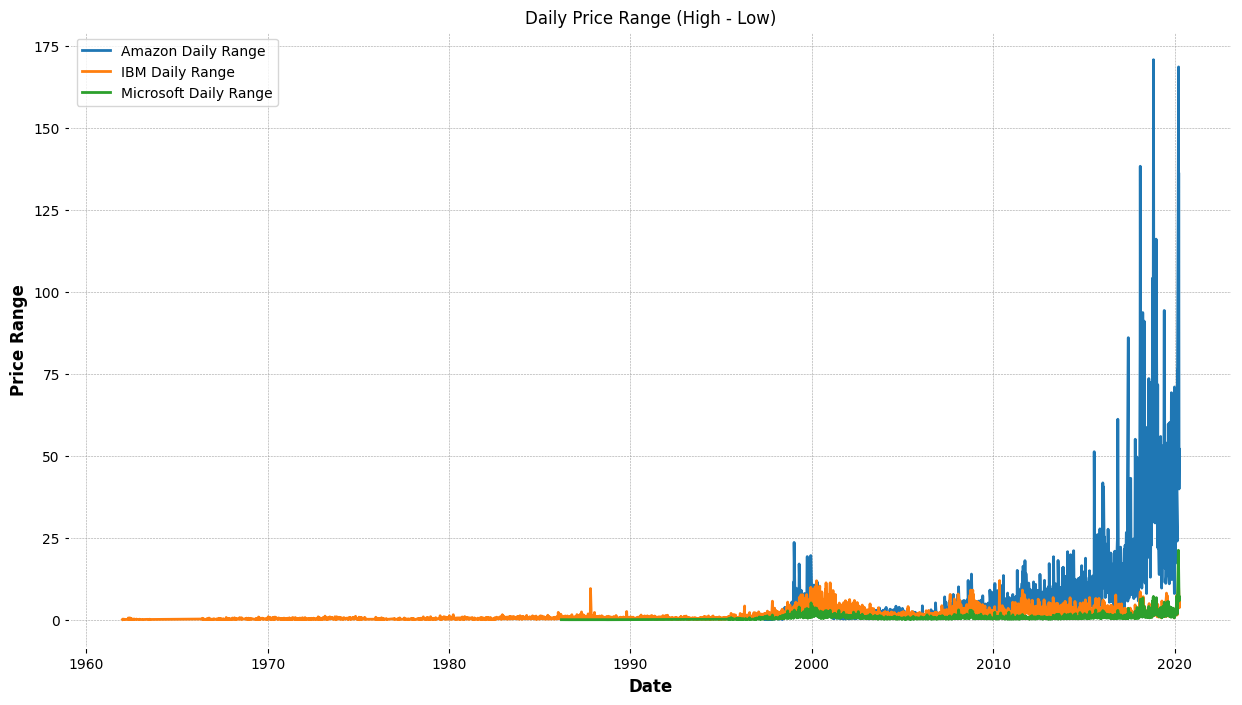

In [219]:
# Calculate daily price range
stock['Daily_Range'] = stock['High'] - stock['Low']

# Plot daily range for each company
plt.figure(figsize=(15, 8))
for company in companies:
    company_data = stock[stock['Company'] == company]
    plt.plot(company_data.index, company_data['Daily_Range'], label=f'{company} Daily Range')

plt.title('Daily Price Range (High - Low)')
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.legend()
plt.show()


### Price Movement (Close vs. Open)
This gives an idea of the direction and magnitude of price changes during the trading day.

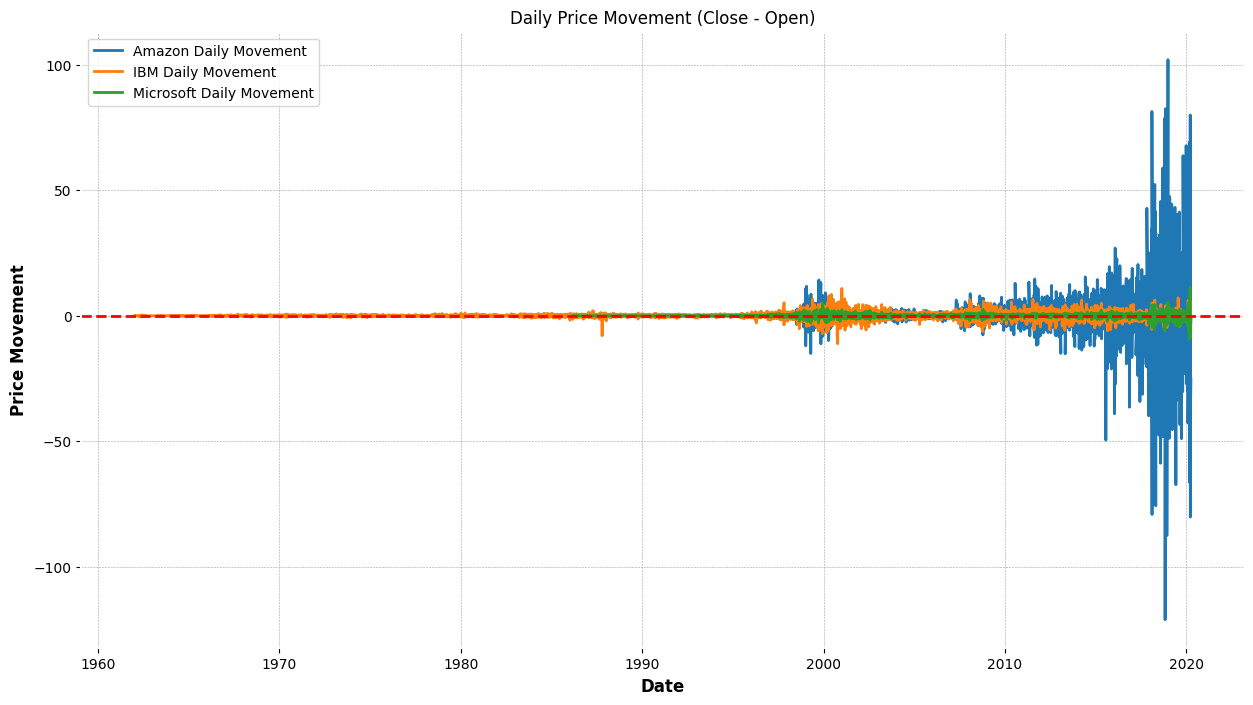

In [220]:
# Calculate daily price movement
stock['Daily_Movement'] = stock['Close'] - stock['Open']

# Plot daily movement for each company
plt.figure(figsize=(15, 8))
for company in companies:
    company_data = stock[stock['Company'] == company]
    plt.plot(company_data.index, company_data['Daily_Movement'], label=f'{company} Daily Movement')

plt.axhline(y=0, color='red', linestyle='--')  # Mark zero movement for reference
plt.title('Daily Price Movement (Close - Open)')
plt.xlabel('Date')
plt.ylabel('Price Movement')
plt.legend()
plt.show()


### Rolling Volatility
Rolling volatility tracks the standard deviation of returns over a specified window (e.g., 30 days).

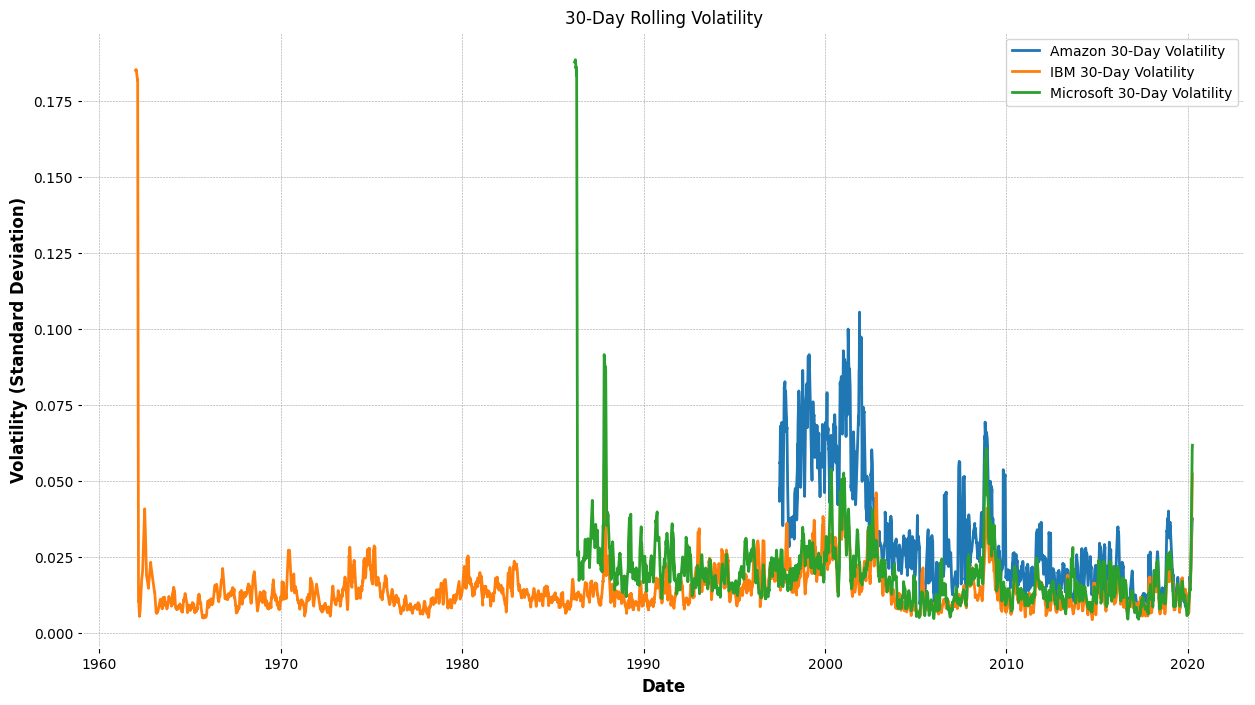

In [221]:
# Calculate daily returns
stock['Daily_Return'] = stock['Close'].pct_change()

# Calculate rolling volatility (30-day window)
stock['Rolling_Volatility'] = stock['Daily_Return'].rolling(window=30).std()

# Plot rolling volatility for each company
plt.figure(figsize=(15, 8))
for company in companies:
    company_data = stock[stock['Company'] == company]
    plt.plot(company_data.index, company_data['Rolling_Volatility'], label=f'{company} 30-Day Volatility')

plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.show()


### Overlay Volatility on Price Trends
To visualize volatility in context with price changes:

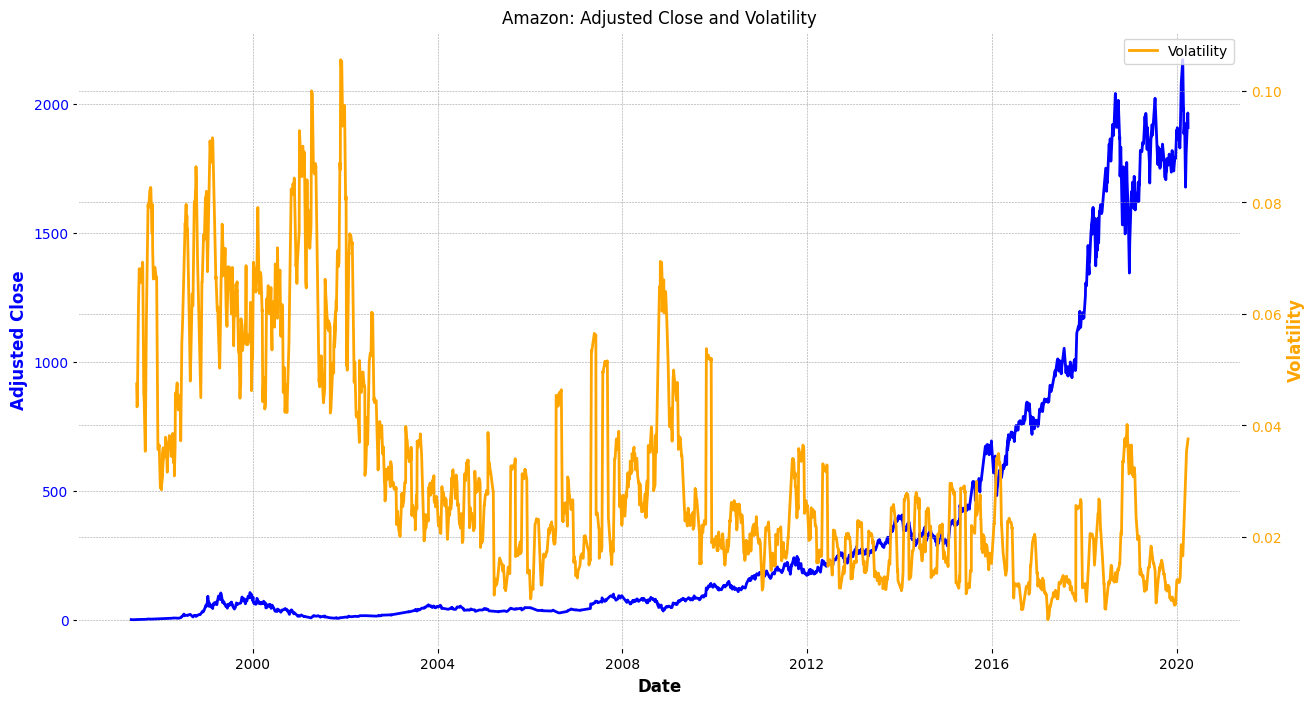

In [222]:
# Plot adjusted closing price and rolling volatility for Amazon
amzn_data = stock[stock['Company'] == 'Amazon']

fig, ax1 = plt.subplots(figsize=(15, 8))

# Adjusted close price
ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted Close', color='blue')
ax1.plot(amzn_data.index, amzn_data['Adj Close'], label='Adjusted Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Rolling volatility
ax2 = ax1.twinx()
ax2.set_ylabel('Volatility', color='orange')
ax2.plot(amzn_data.index, amzn_data['Rolling_Volatility'], label='Volatility', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Amazon: Adjusted Close and Volatility')
plt.legend()
plt.show()


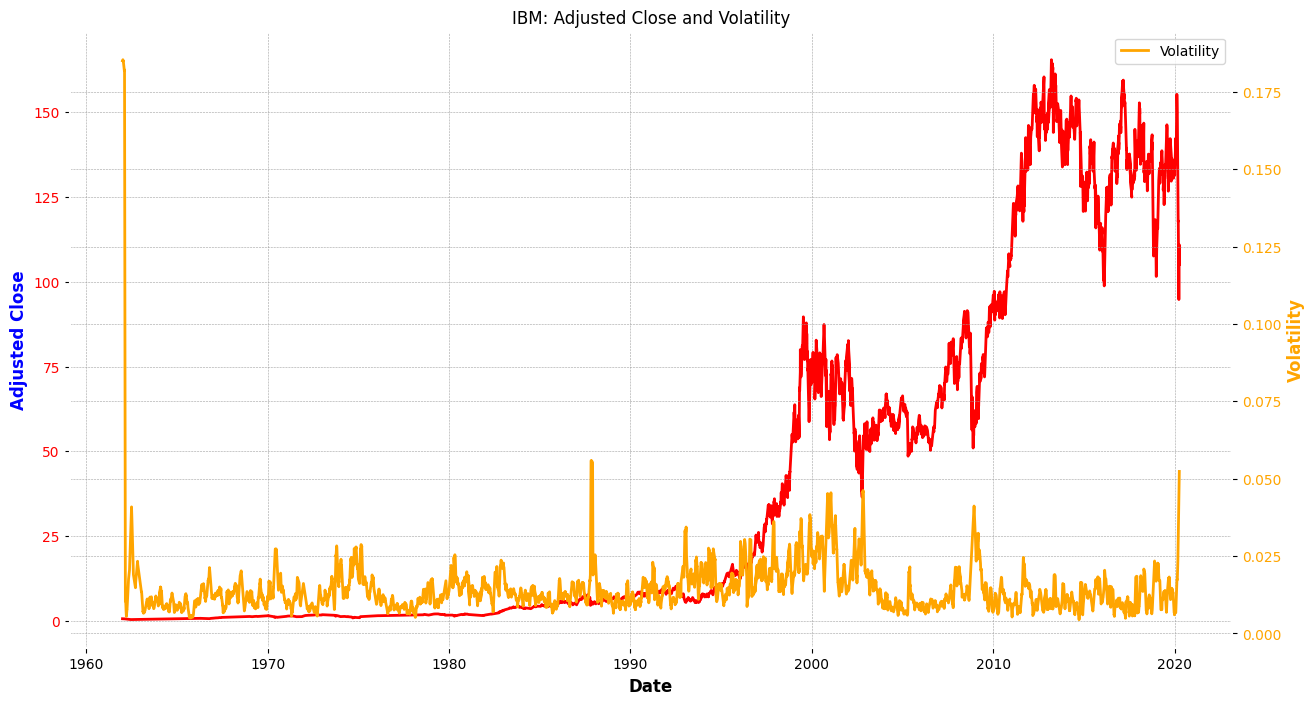

In [223]:
# Plot adjusted closing price and rolling volatility for IBM
ibm_data = stock[stock['Company'] == 'IBM']

fig, ax1 = plt.subplots(figsize=(15, 8))

# Adjusted close price
ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted Close', color='blue')
ax1.plot(ibm_data.index, ibm_data['Adj Close'], label='Adjusted Close', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Rolling volatility
ax2 = ax1.twinx()
ax2.set_ylabel('Volatility', color='orange')
ax2.plot(ibm_data.index, ibm_data['Rolling_Volatility'], label='Volatility', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('IBM: Adjusted Close and Volatility')
plt.legend()
plt.show()


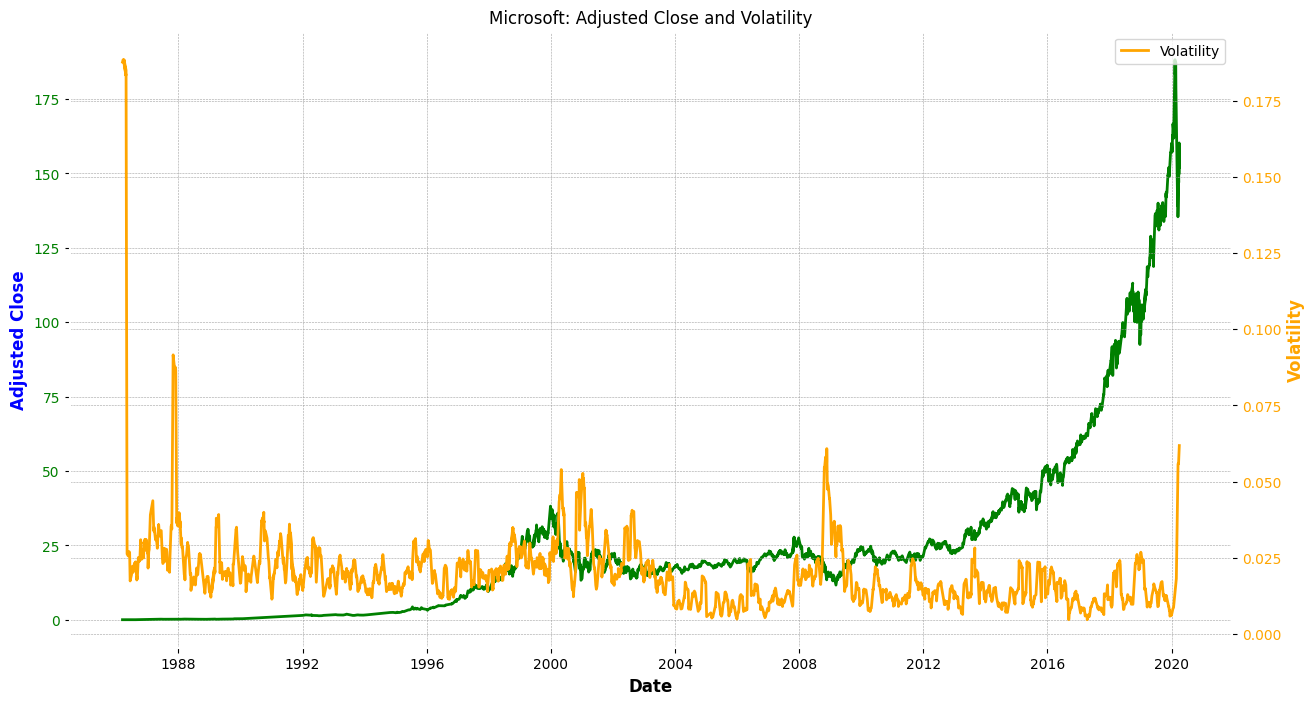

In [224]:
# Plot adjusted closing price and rolling volatility for Microsoft
msft_data = stock[stock['Company'] == 'Microsoft']

fig, ax1 = plt.subplots(figsize=(15, 8))

# Adjusted close price
ax1.set_xlabel('Date')
ax1.set_ylabel('Adjusted Close', color='blue')
ax1.plot(msft_data.index, msft_data['Adj Close'], label='Adjusted Close', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Rolling volatility
ax2 = ax1.twinx()
ax2.set_ylabel('Volatility', color='orange')
ax2.plot(msft_data.index, msft_data['Rolling_Volatility'], label='Volatility', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Microsoft: Adjusted Close and Volatility')
plt.legend()
plt.show()

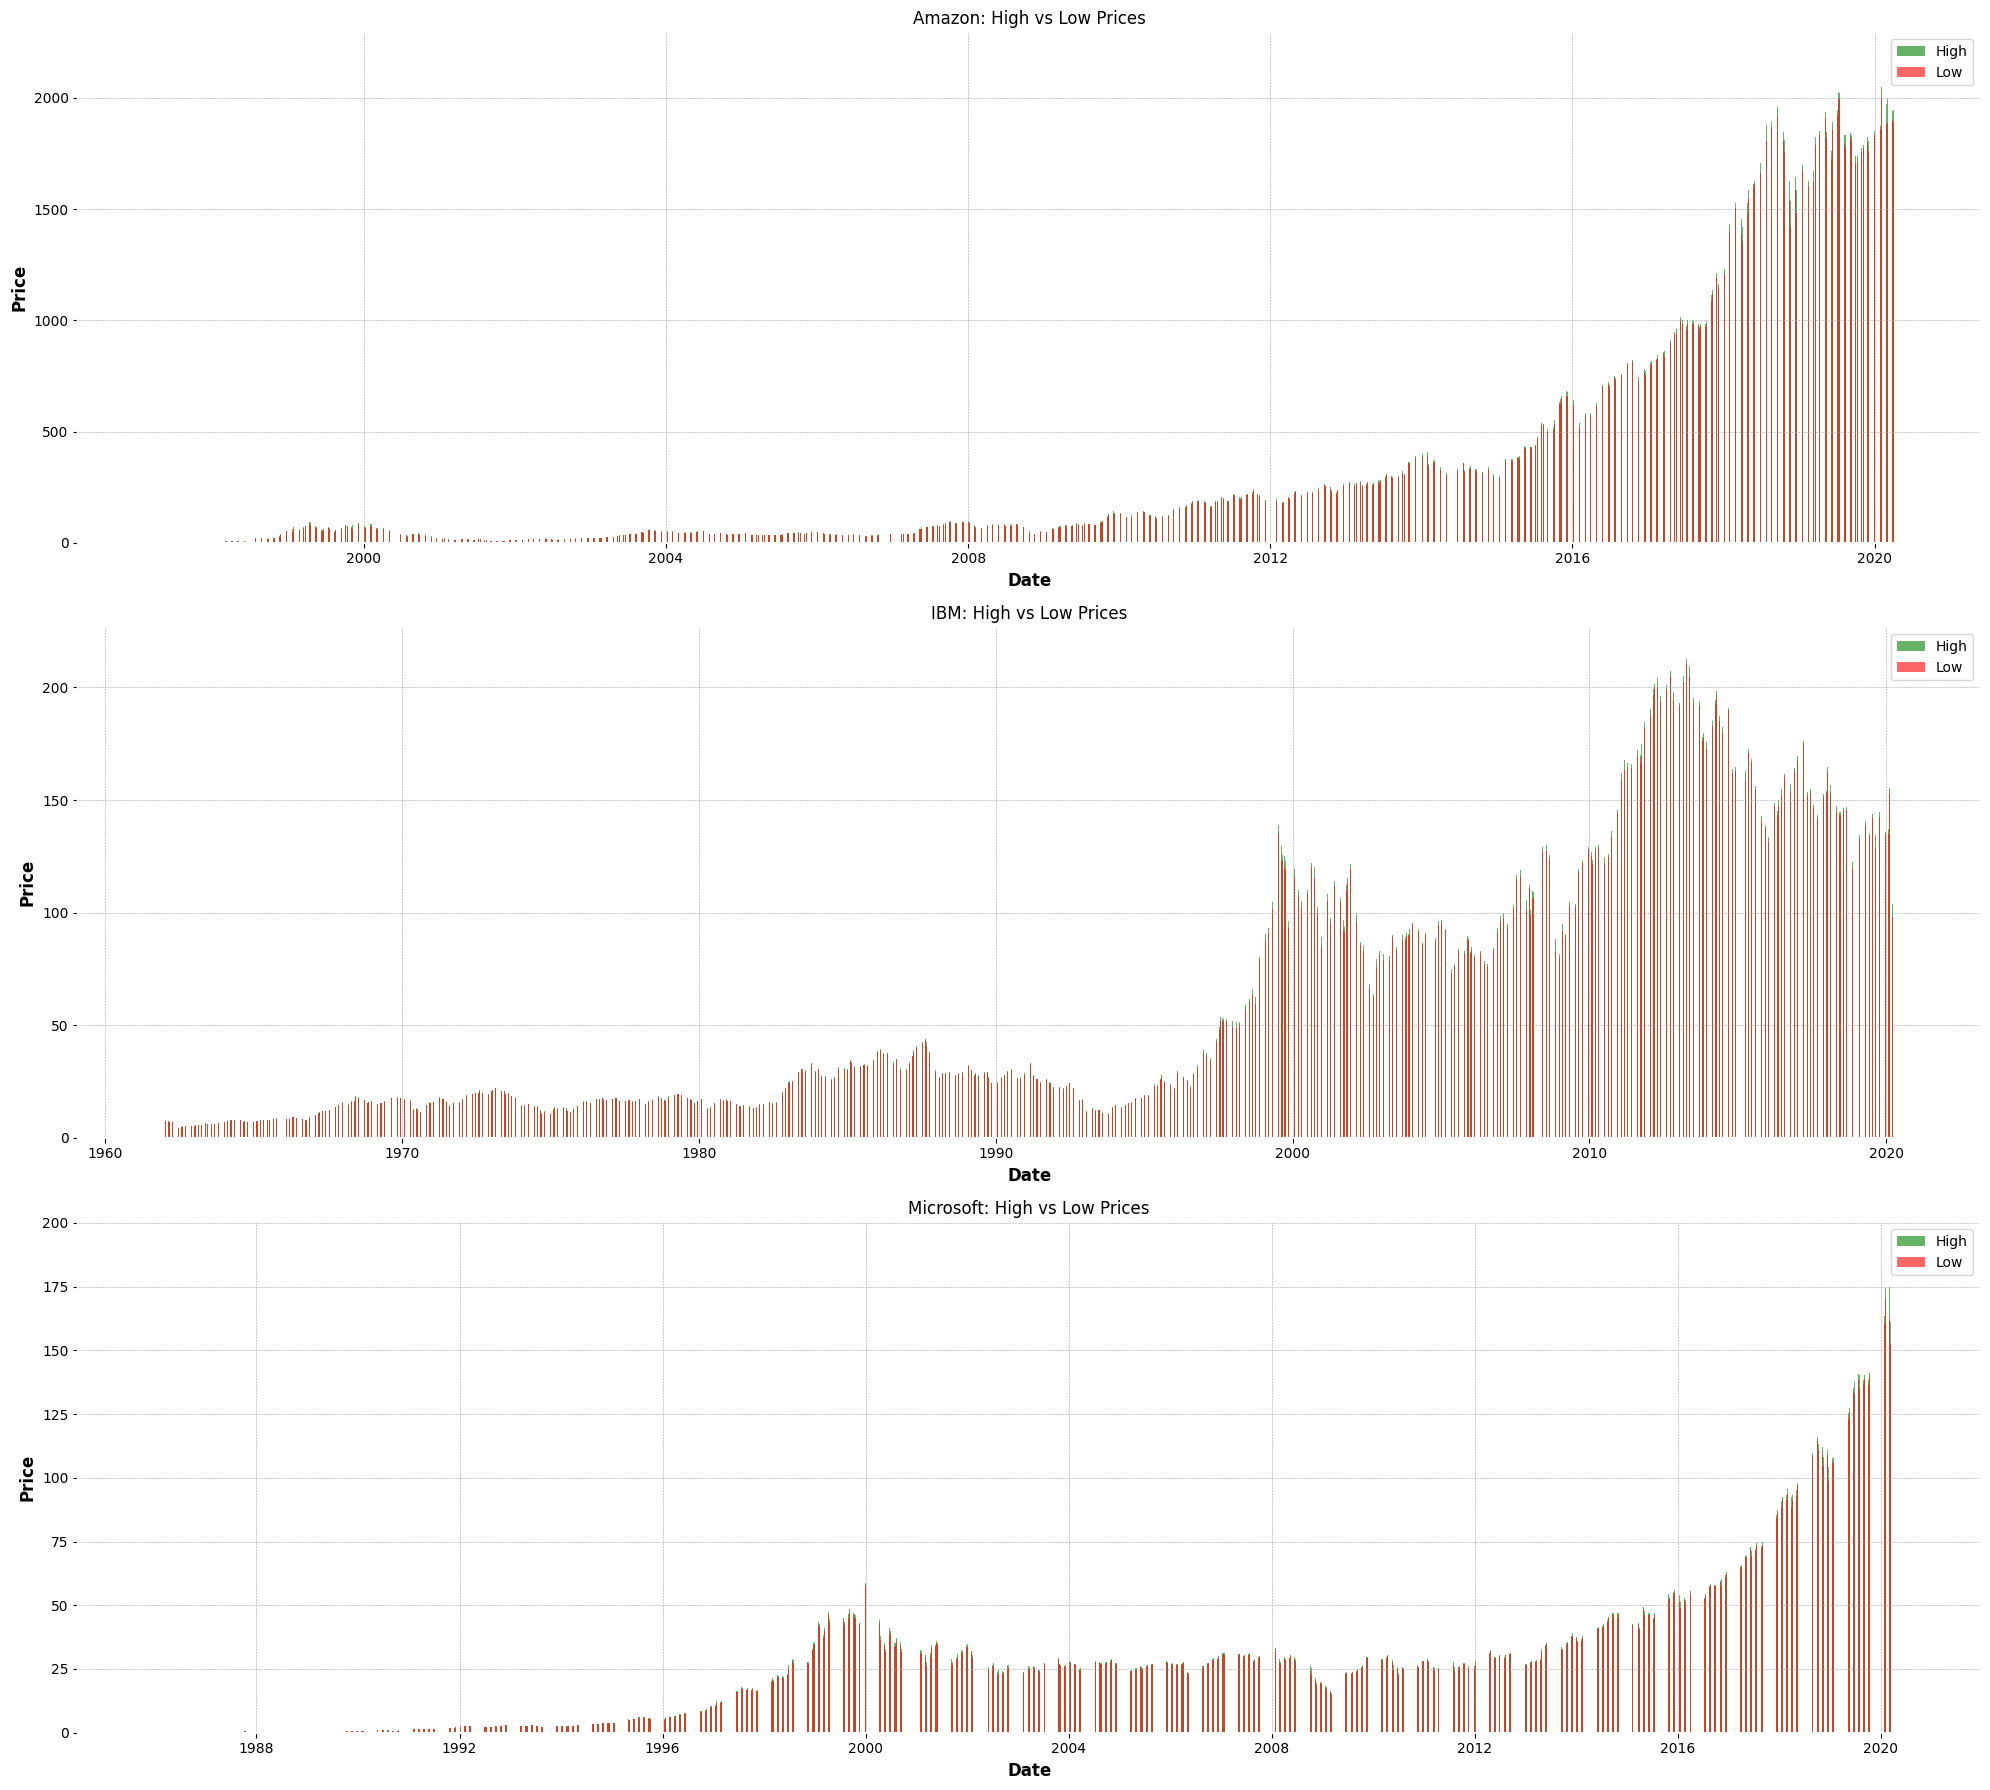

In [225]:
# Set up a plotting figure
plt.figure(figsize=(20, 18))

# Iterate over the companies and plot High vs Low as bar graphs
for i, company in enumerate(companies, 1):
    # Filter data for the current company
    company_data = stock[stock['Company'] == company]

    # Create subplot
    plt.subplot(3, 1, i)

    # Plot High and Low prices as bar graphs
    bar_width = 0.4
    plt.bar(company_data.index, company_data['High'], width=bar_width, label='High', color='green', alpha=0.6)
    plt.bar(company_data.index, company_data['Low'], width=bar_width, label='Low', color='red', alpha=0.6)

    plt.title(f'{company}: High vs Low Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()  # Adjust spacing for clarity

# Show the plot
plt.show()

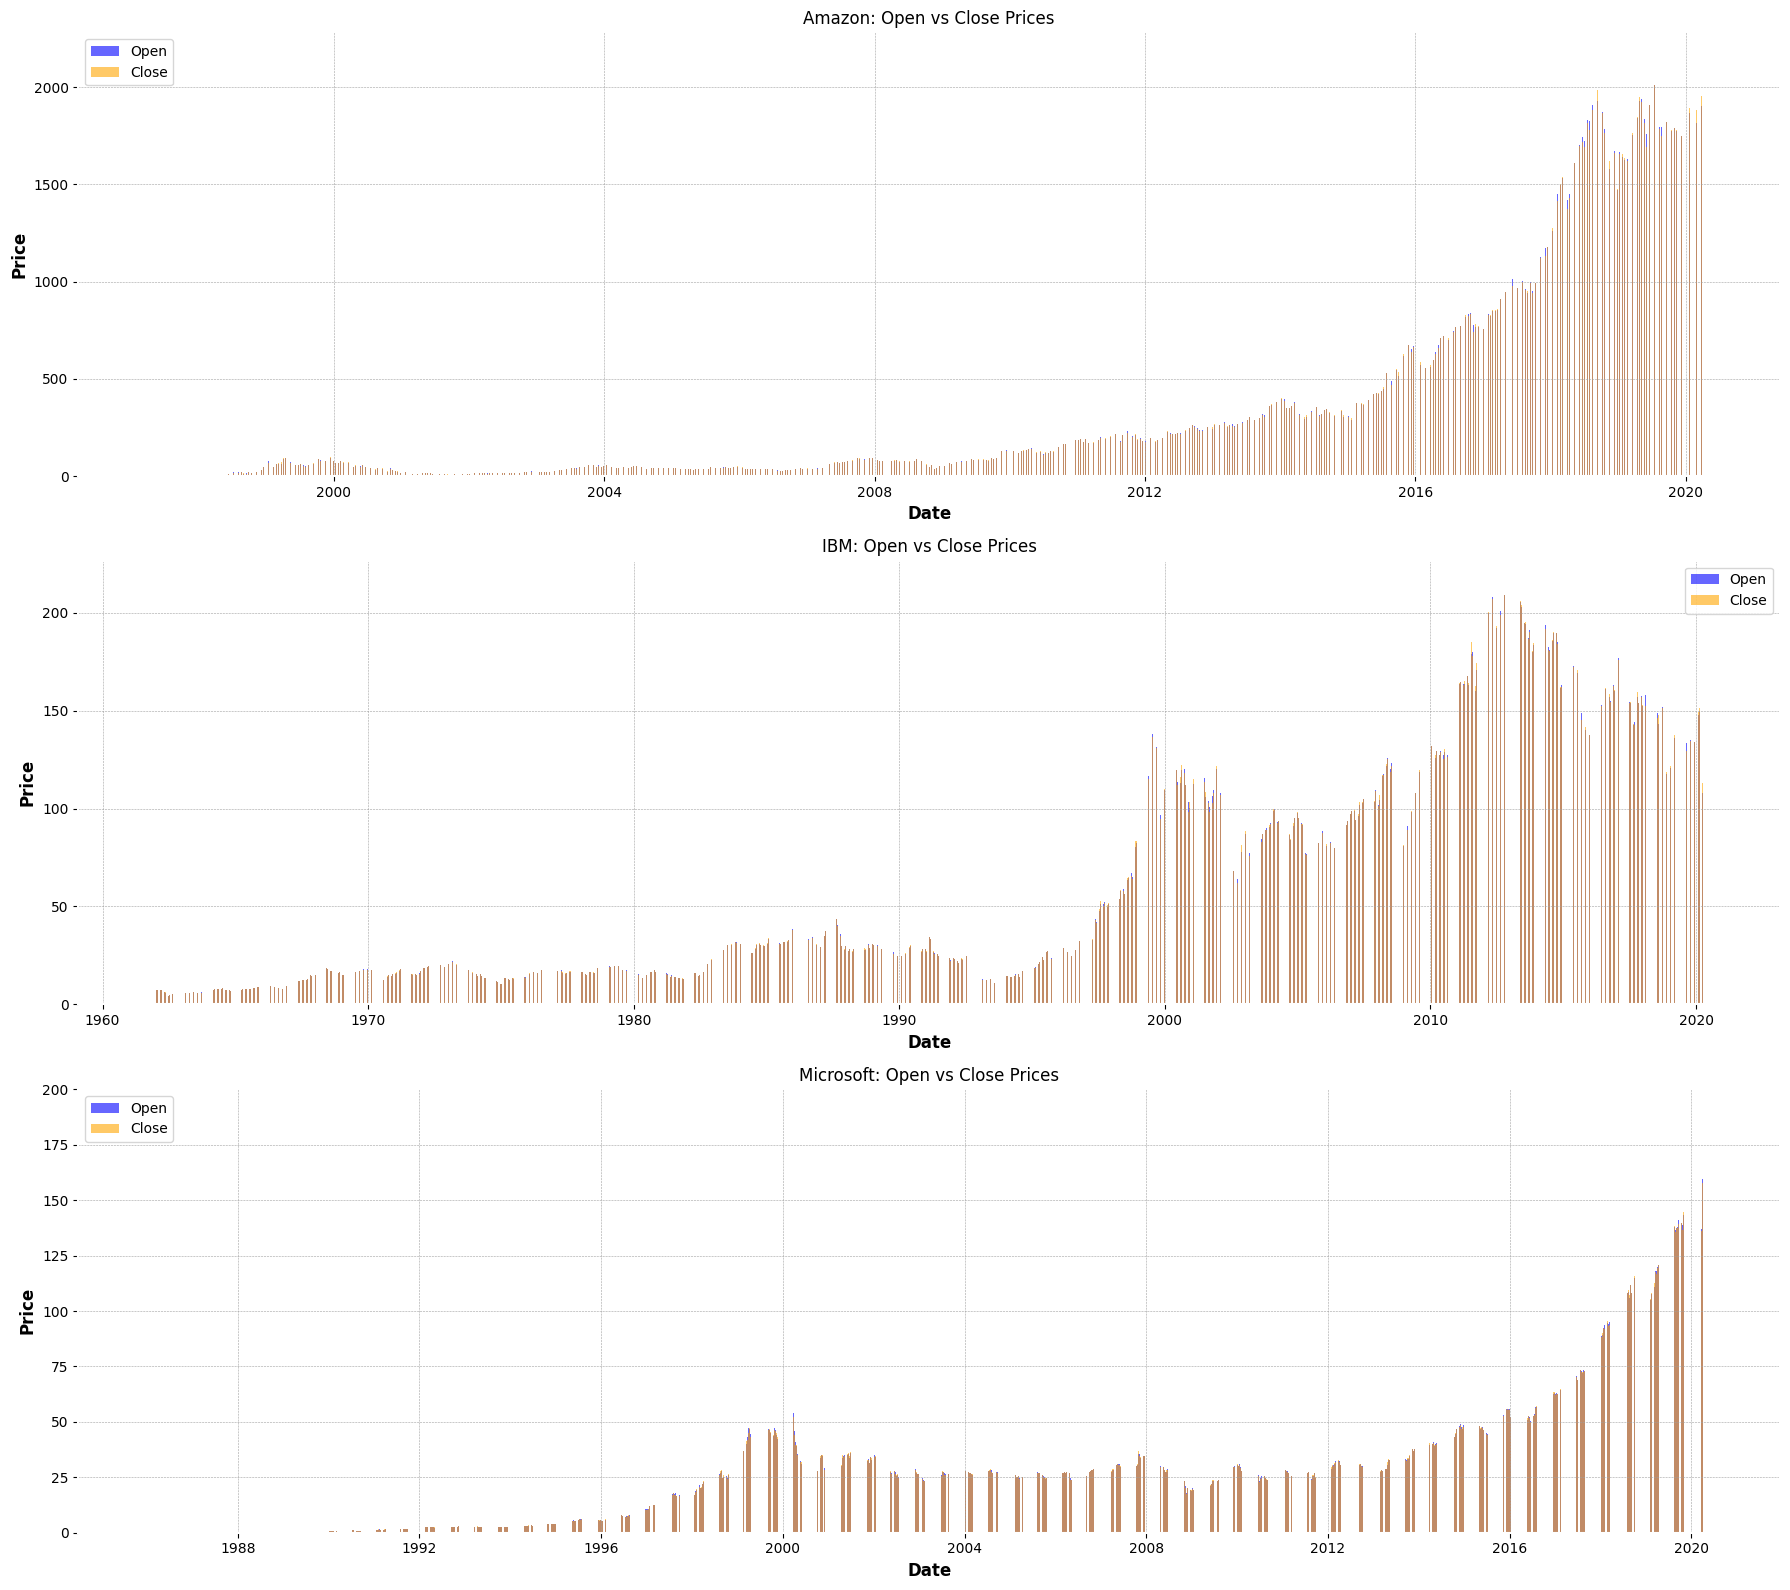

In [226]:
# Set up a plotting figure
plt.figure(figsize=(18, 16))

# Iterate over the companies and plot Open vs Close as bar graphs
for i, company in enumerate(companies, 1):
    # Filter data for the current company
    company_data = stock[stock['Company'] == company]

    # Create subplot
    plt.subplot(3, 1, i)

    # Plot Open and Close prices as bar graphs
    bar_width = 0.4
    plt.bar(company_data.index, company_data['Open'], width=bar_width, label='Open', color='blue', alpha=0.6)
    plt.bar(company_data.index, company_data['Close'], width=bar_width, label='Close', color='orange', alpha=0.6)

    plt.title(f'{company}: Open vs Close Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()  # Adjust spacing for clarity

# Show the plot
plt.show()

# Volume Trends:

Investigate how trading volume affects price changes. High trading volumes often signal strong investor interest, and large price movements on high volume may indicate a trend or shift in market sentiment.

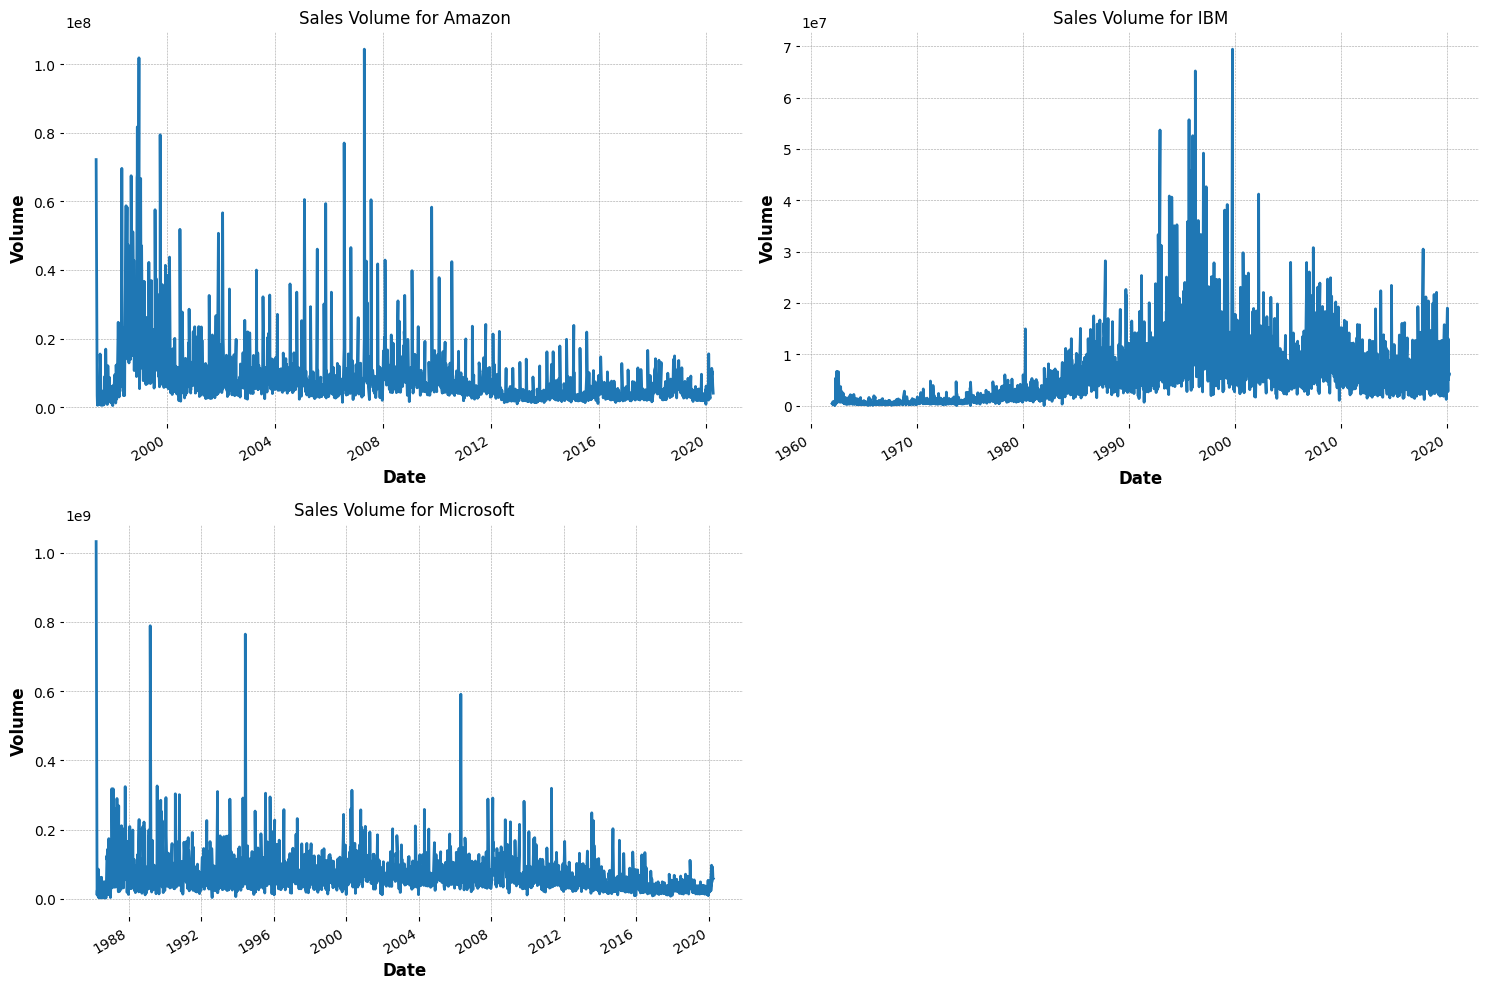

In [227]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

companies = ['Amazon', 'IBM', 'Microsoft']

for i, company in enumerate(companies, 1):
    company_data = stock[stock['Company'] == company]
    
    plt.subplot(2, 2, i)
    company_data['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Sales Volume for {company}")
    
plt.tight_layout()

### Volume Trend Plots

**Rolling Volume Average (Green Dashed Line):**
Adds a smoothed trendline for volume, making long-term trends visible.
Helps identify periods of consistently increasing or decreasing trading activity.

**High-Volume Date Annotation (Red Vertical Lines):**
Highlights dates where trading volume exceeds the 95th percentile.
Useful for pinpointing events or news that drove unusually high investor interest.

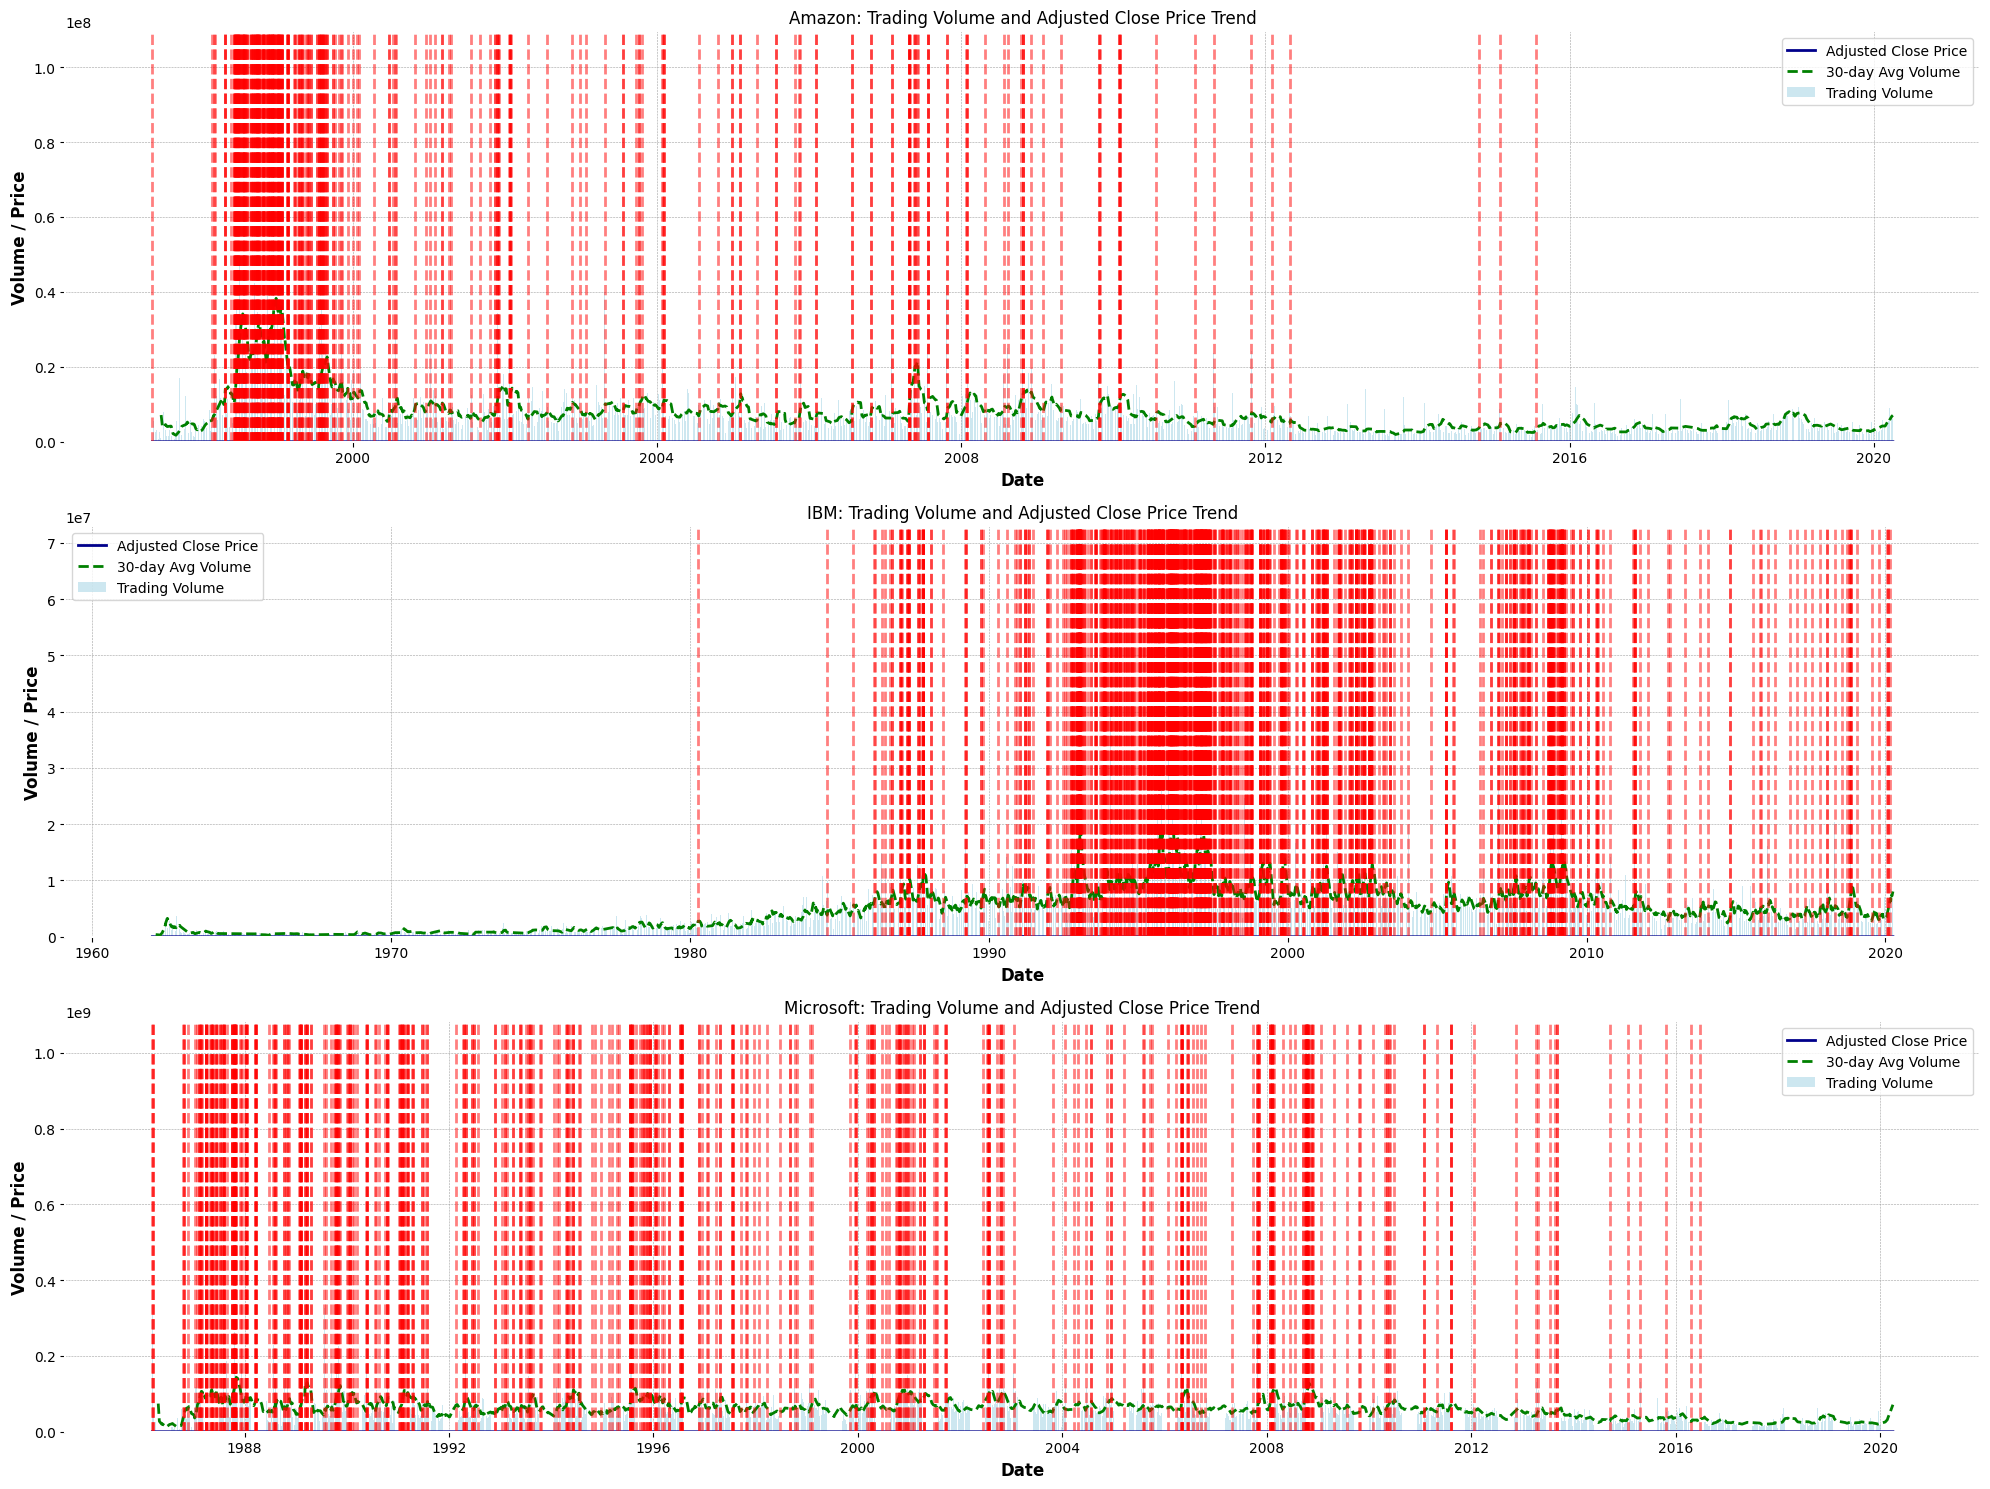

In [228]:
# Set up a plotting figure
plt.figure(figsize=(20, 15))

# Iterate over the companies and plot their volume trends
for i, company in enumerate(companies, 1):
    # Filter data for the current company
    company_data = stock[stock['Company'] == company]

    # Calculate 30-day rolling average of volume
    company_data['Rolling Volume'] = company_data['Volume'].rolling(window=30).mean()

    # Identify high volume dates (top 5% of volumes)
    high_volume_threshold = company_data['Volume'].quantile(0.95)
    high_volume_dates = company_data[company_data['Volume'] > high_volume_threshold]

    # Create subplot for each company
    plt.subplot(3, 1, i)

    # Plot the trading volume as bars
    plt.bar(company_data.index, company_data['Volume'], label='Trading Volume', color='lightblue', alpha=0.6)

    # Overlay Adjusted Closing Price as a line plot
    plt.plot(company_data.index, company_data['Adj Close'], label='Adjusted Close Price', color='darkblue', linewidth=2)

    # Plot the rolling average volume trend
    plt.plot(company_data.index, company_data['Rolling Volume'], label='30-day Avg Volume', color='green', linestyle='--', linewidth=2)

    # Highlight high-volume dates
    for date in high_volume_dates.index:
        plt.axvline(x=date, color='red', linestyle='--', alpha=0.5)

    plt.title(f'{company}: Trading Volume and Adjusted Close Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Volume / Price')
    plt.legend()
    plt.tight_layout()  # Adjust spacing for clarity

# Show the plot
plt.show()


# Support and Resistance

A Volume Profile chart is a tool used in technical analysis to show the amount of volume traded at specific price levels over a certain period. It's commonly used to identify support and resistance levels based on where the highest volume has occurred at various price levels.

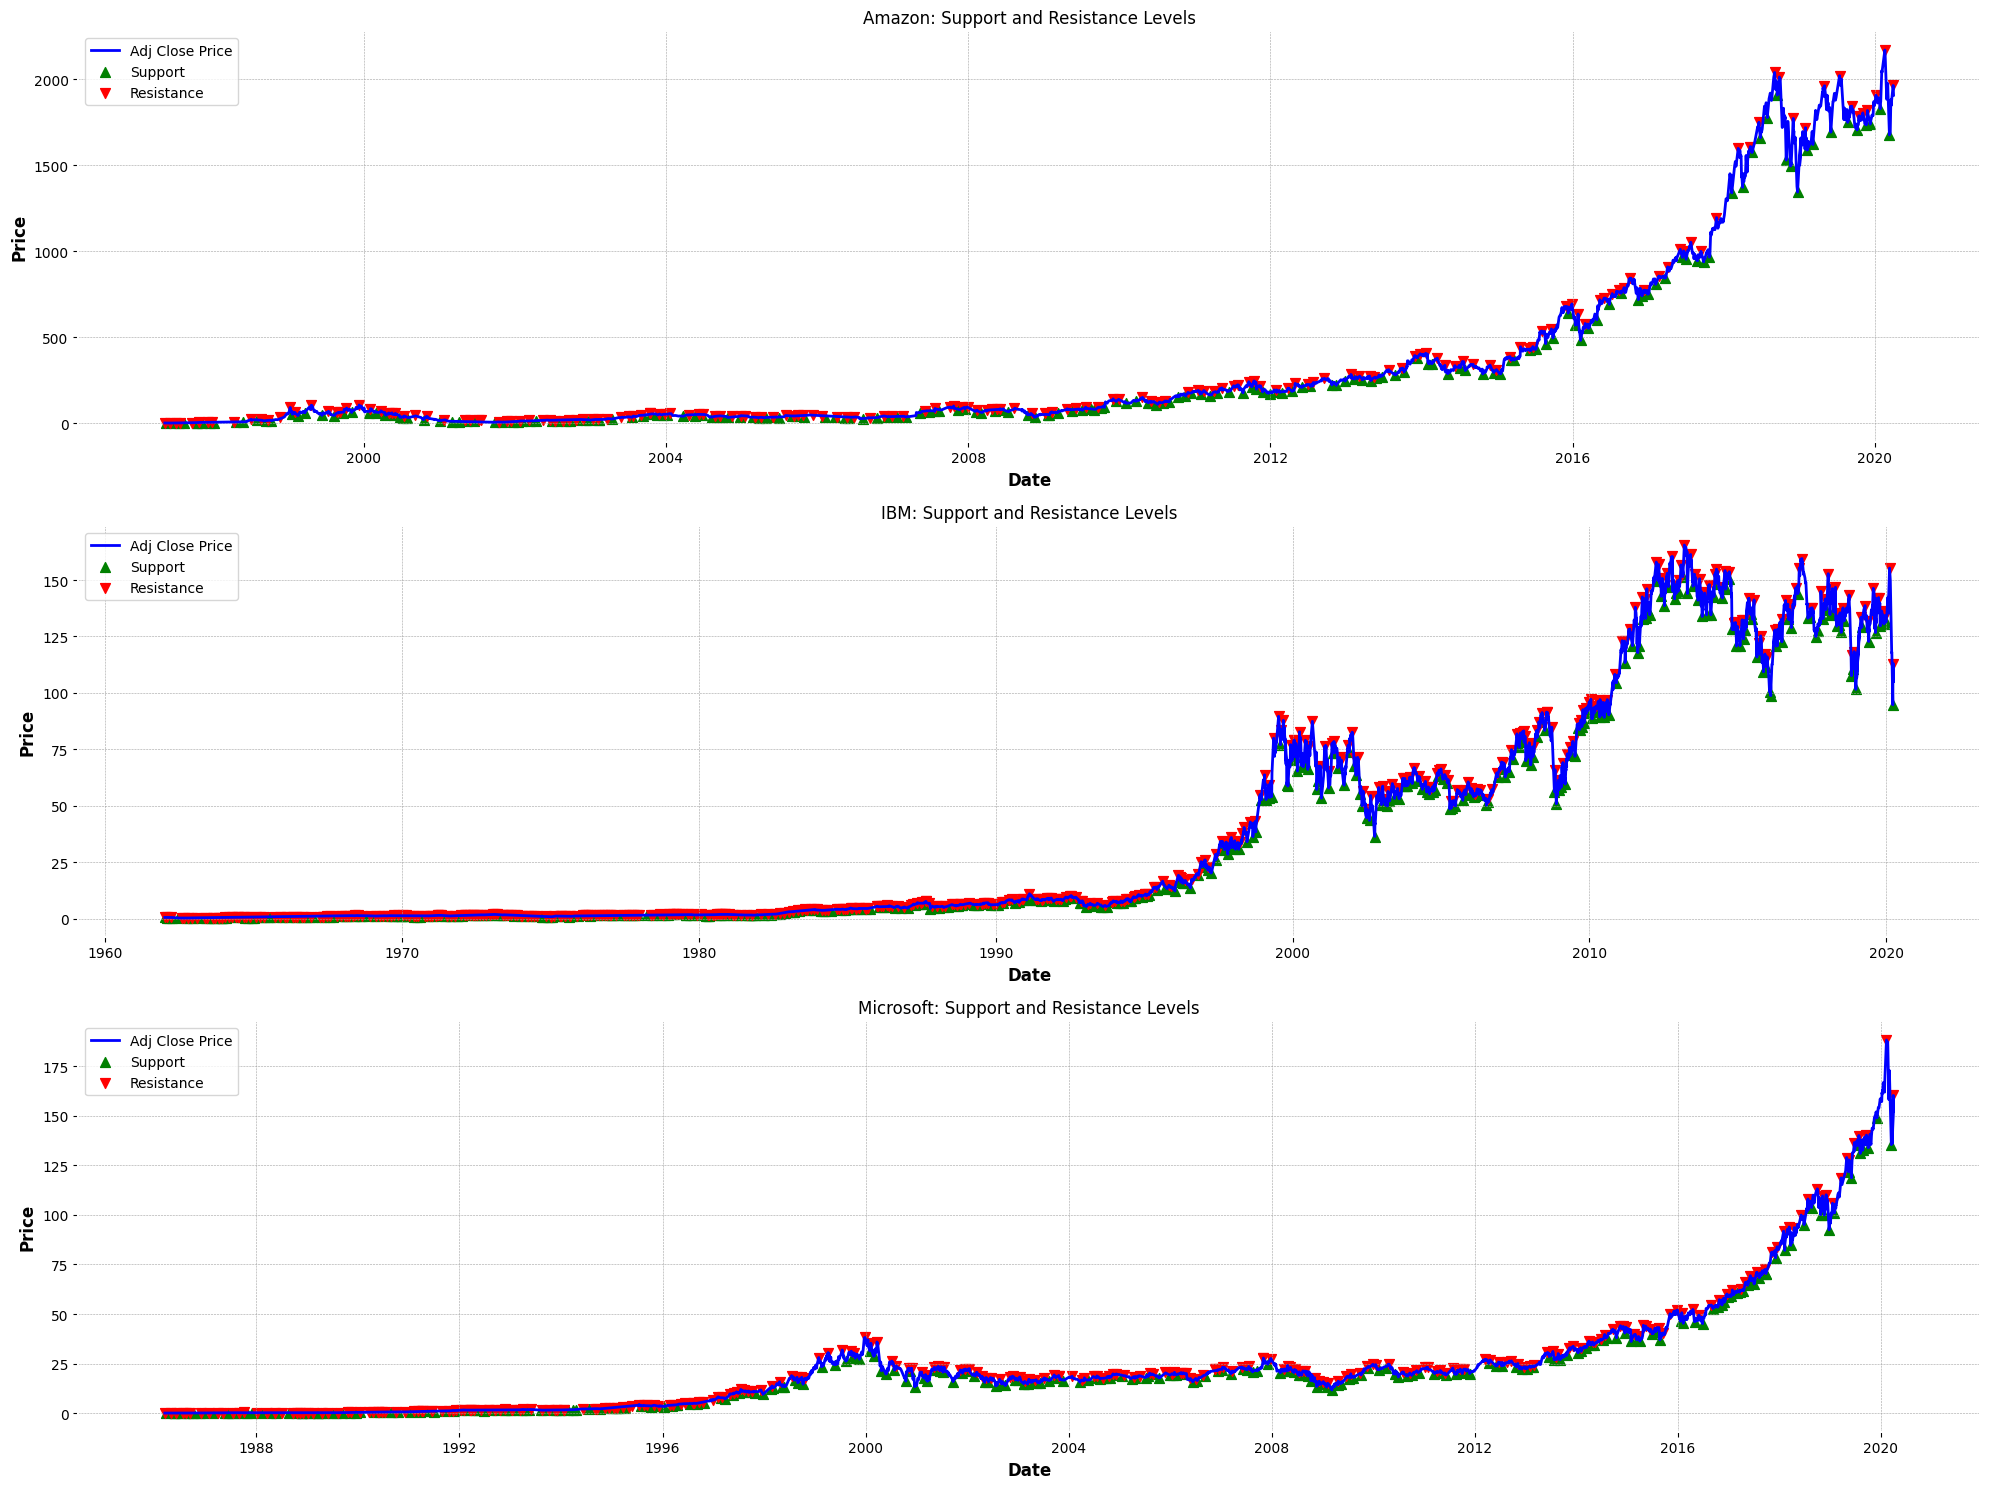

In [230]:
from scipy.signal import argrelextrema

# Function to calculate local minima and maxima
def find_support_resistance(data, window=10):
    # Find local minima (support)
    local_min = argrelextrema(data['Adj Close'].values, np.less_equal, order=window)[0]
    # Find local maxima (resistance)
    local_max = argrelextrema(data['Adj Close'].values, np.greater_equal, order=window)[0]
    return local_min, local_max

# Plot support and resistance for each company
plt.figure(figsize=(20, 15))

for i, company in enumerate(companies, 1):
    company_data = stock[stock['Company'] == company]
    
    # Find support and resistance levels
    support, resistance = find_support_resistance(company_data, window=10)
    
    # Plot Adjusted Close Price
    plt.subplot(3, 1, i)
    plt.plot(company_data.index, company_data['Adj Close'], label='Adj Close Price', color='blue')

    # Mark support points
    plt.scatter(company_data.iloc[support].index, company_data.iloc[support]['Adj Close'], 
                label='Support', color='green', s=50, marker='^')
    
    # Mark resistance points
    plt.scatter(company_data.iloc[resistance].index, company_data.iloc[resistance]['Adj Close'], 
                label='Resistance', color='red', s=50, marker='v')
    
    plt.title(f'{company}: Support and Resistance Levels')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()

# Show the plot
plt.show()


# Moving Averages and Technical Indicators:

Use technical indicators such as moving averages (SMA, EMA) or Bollinger Bands to identify :
             trends, momentum, and potential price reversals.

These indicators help to smooth out daily fluctuations and identify broader price trenchanges


* Date vs. Close (for calculating moving averages).
* Close vs. Volume (for momentum indicators like On-Balance Volume)
.

### 1. Moving Averages (MAs)
Types of Moving Averages:
* **Simple Moving Average (SMA):** Average of prices over a fixed window.
Example: 20-day SMA.
* **Exponential Moving Average (EMA):** Weighted average giving more importance to recent prices.
Example: 20-day EMA.

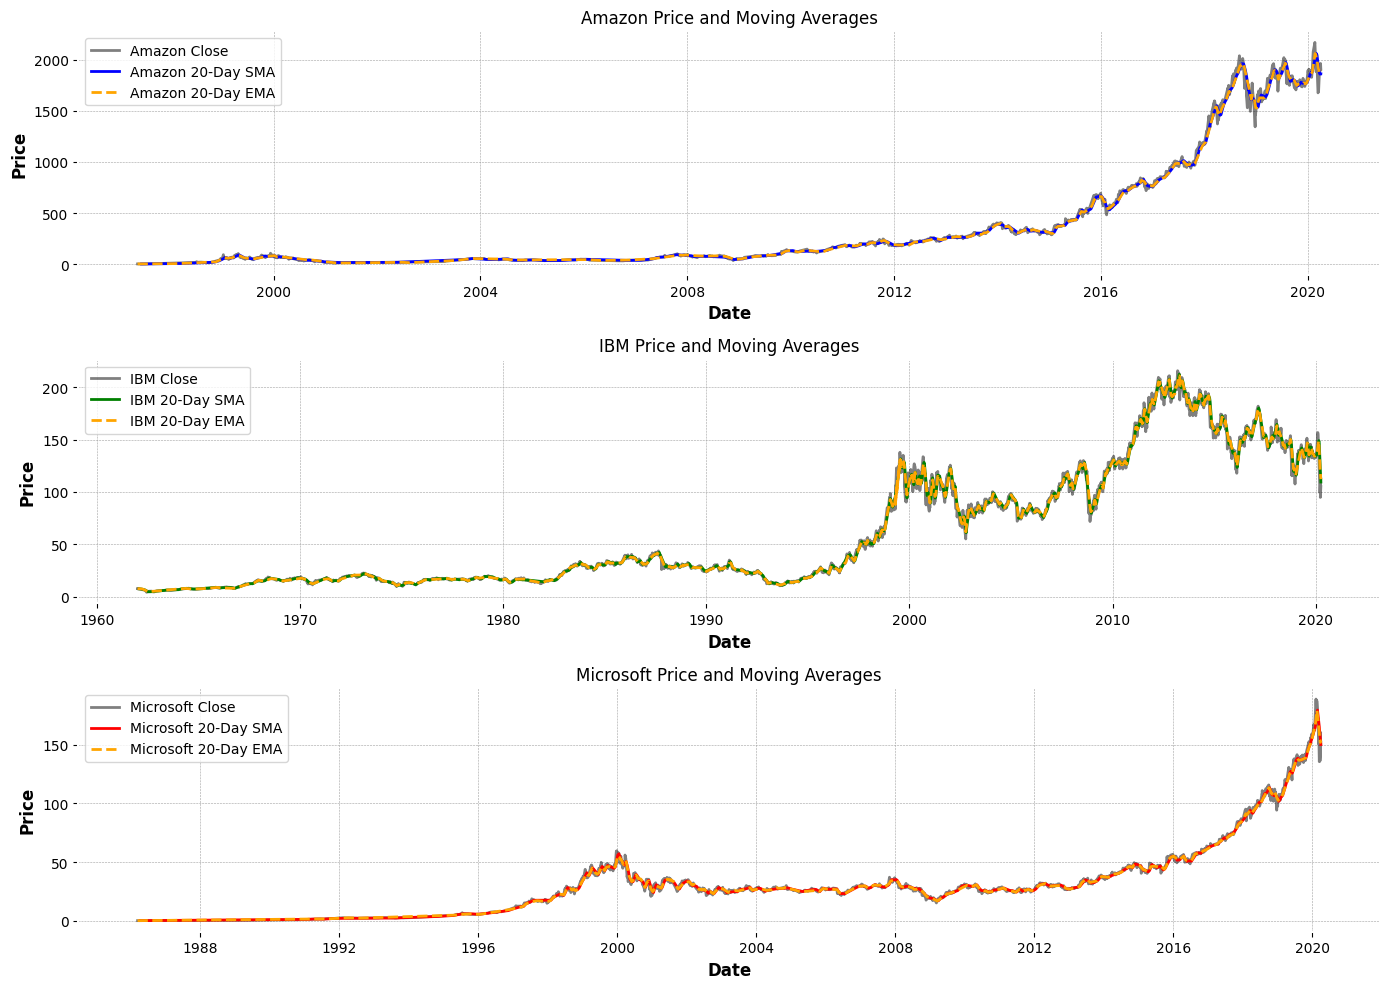

In [231]:
companies = ['Amazon', 'IBM', 'Microsoft']
stock_filtered = stock[stock['Company'].isin(companies)]

# Calculate SMA and EMA for each company
sma_window = 20  # 20-day moving average
ema_window = 20  # 20-day EMA

# Create an empty plot with multiple subplots
plt.figure(figsize=(14, 10))

# Define colors for plotting (one for each company)
colors = ['blue', 'green', 'red']

for i, company in enumerate(companies, 1):
    company_data = stock_filtered[stock_filtered['Company'] == company]
    
    # Calculate SMA and EMA
    company_data['SMA'] = company_data['Close'].rolling(window=sma_window).mean()
    company_data['EMA'] = company_data['Close'].ewm(span=ema_window, adjust=False).mean()
    
    # Create a subplot for each company
    plt.subplot(len(companies), 1, i)
    plt.plot(company_data.index, company_data['Close'], label=f'{company} Close', color='black', alpha=0.5)
    plt.plot(company_data.index, company_data['SMA'], label=f'{company} {sma_window}-Day SMA', color=colors[i - 1])
    plt.plot(company_data.index, company_data['EMA'], label=f'{company} {ema_window}-Day EMA', color='orange', linestyle='--')
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'{company} Price and Moving Averages')
    plt.legend()

plt.tight_layout()
plt.show()

### 2. Technical Indicators
**A. Relative Strength Index (RSI)**
Measures the speed and magnitude of price movements (momentum).
RSI > 70 indicates overbought; RSI < 30 indicates oversold.

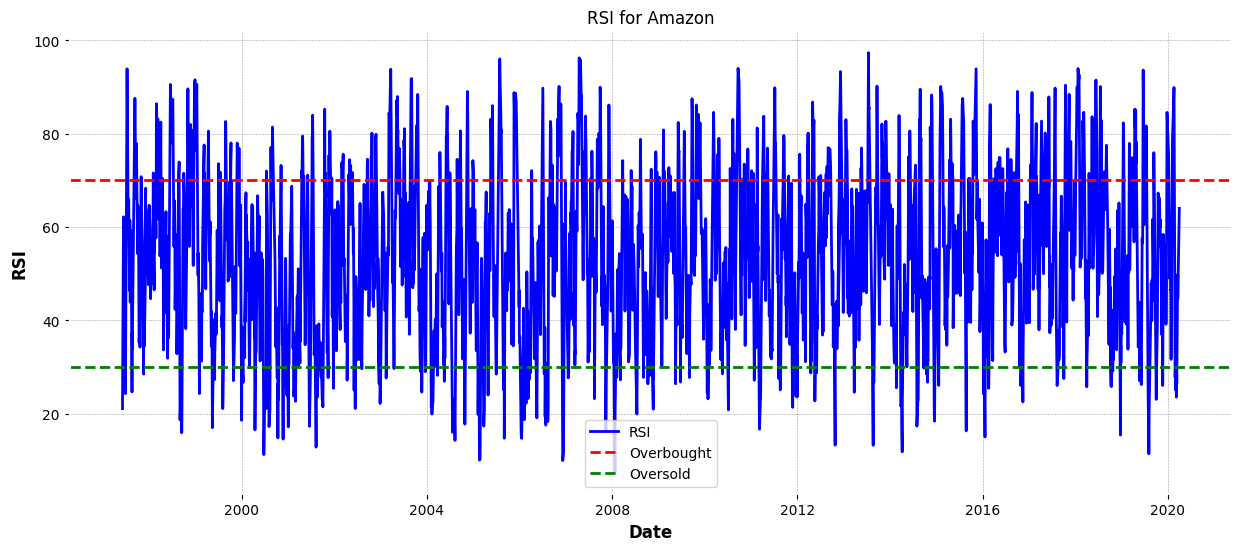

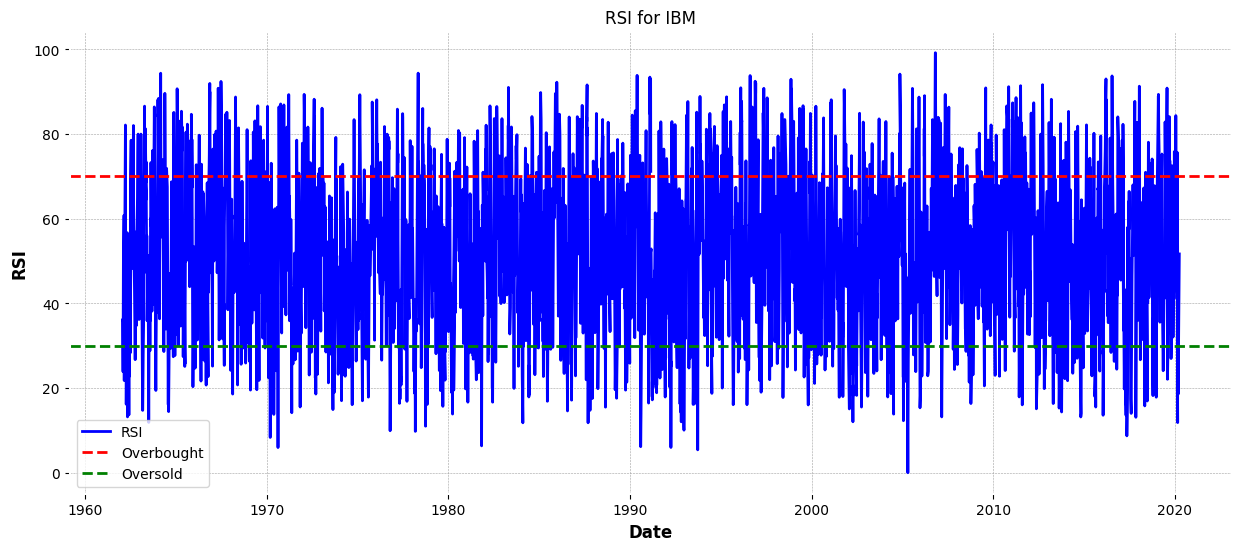

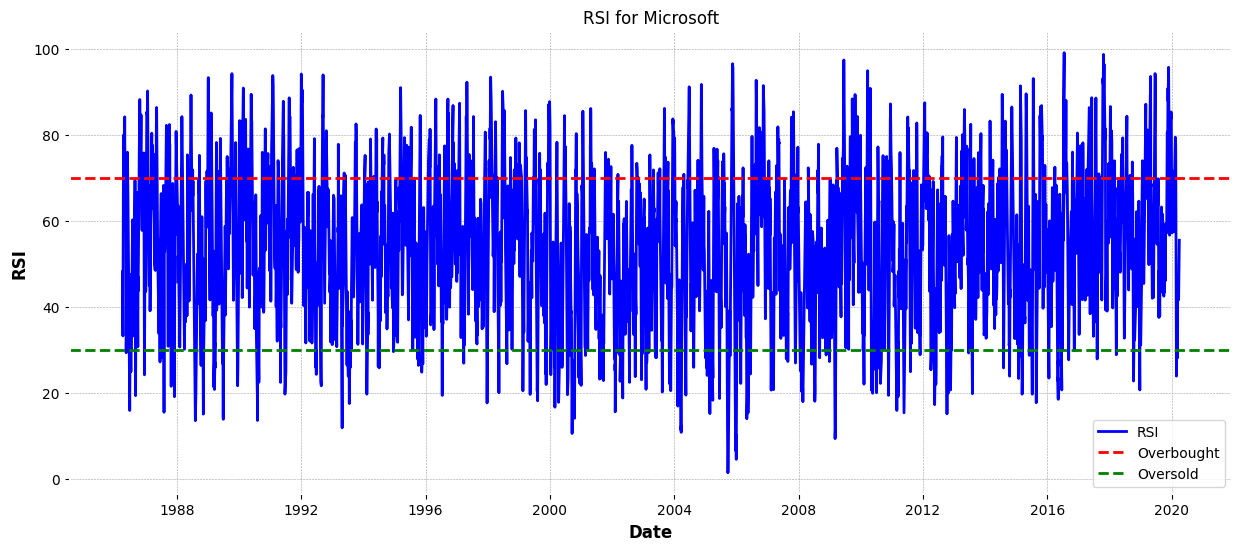

In [232]:
def calculate_rsi(data, window=14):
    delta = data['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

company_rsi = {}

for company in companies:
    company_data = stock[stock['Company'] == company].copy()
    company_data['RSI'] = calculate_rsi(company_data)
    company_rsi[company] = company_data

    # Plot RSI
    plt.figure(figsize=(15, 6))
    plt.plot(company_data['RSI'], label='RSI', color='blue')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title(f'RSI for {company}')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

**B. Moving Average Convergence Divergence (MACD)**
Measures the difference between a short-term EMA (e.g., 12-day) and a long-term EMA (e.g., 26-day).
Signal Line: 9-day EMA of the MACD.
Crossover: Indicates bullish or bearish trends.

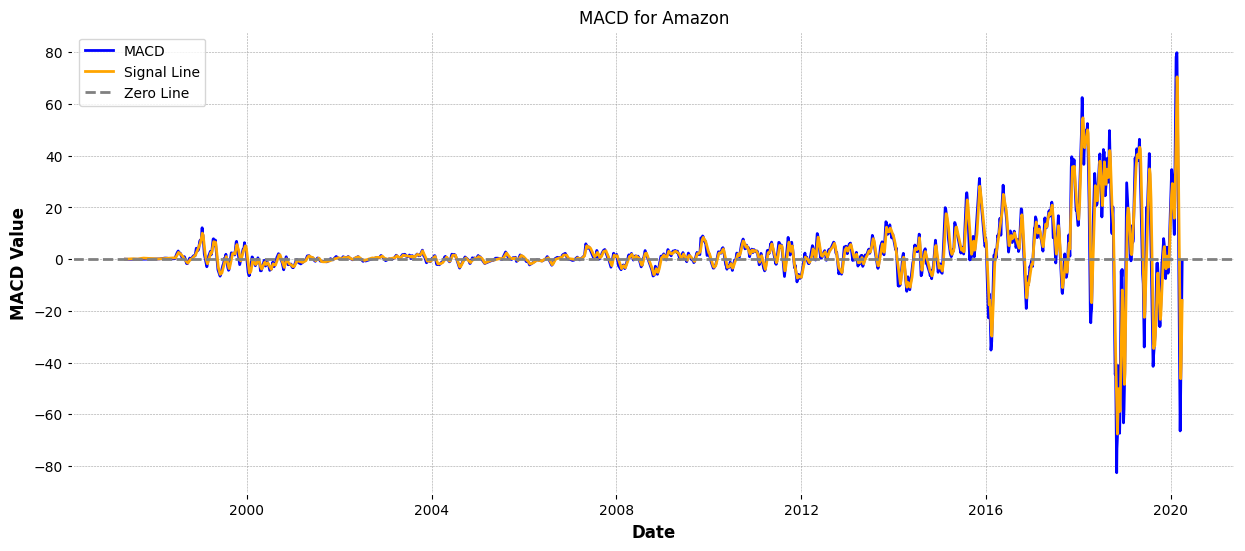

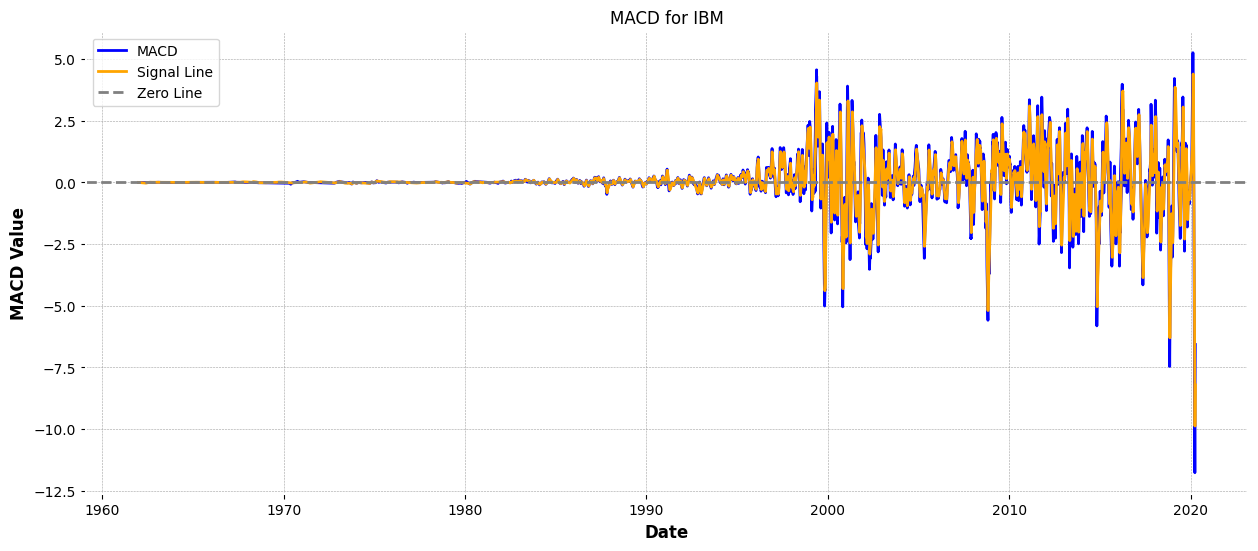

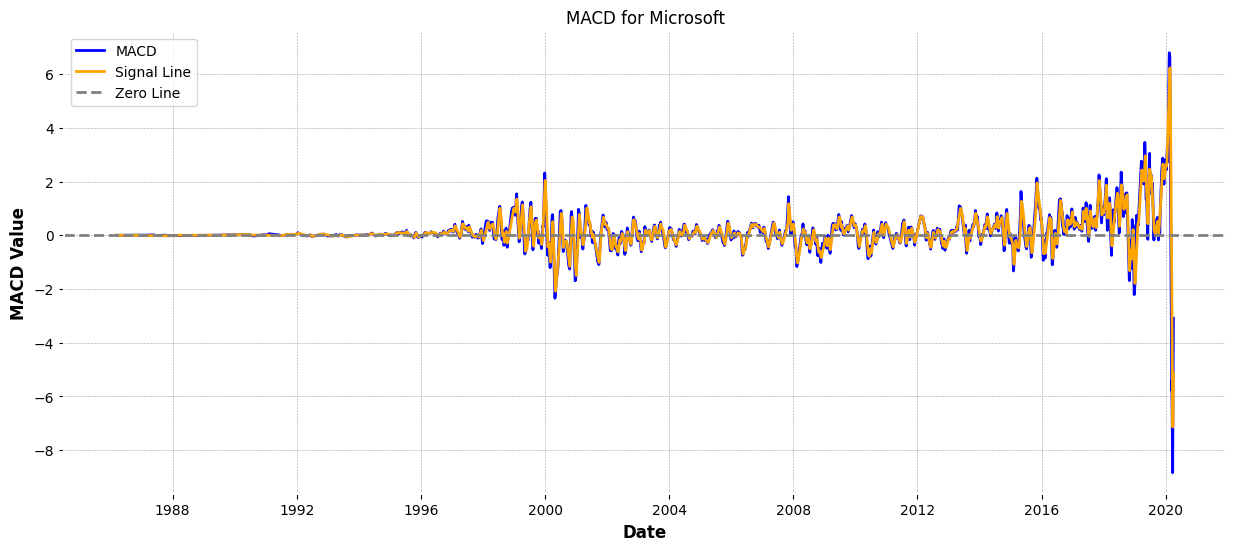

In [233]:
company_macd = {}

for company in companies:
    company_data = stock[stock['Company'] == company].copy()
    short_ema = company_data['Adj Close'].ewm(span=12, adjust=False).mean()
    long_ema = company_data['Adj Close'].ewm(span=26, adjust=False).mean()
    company_data['MACD'] = short_ema - long_ema
    company_data['Signal_Line'] = company_data['MACD'].ewm(span=9, adjust=False).mean()
    company_macd[company] = company_data

    # Plot MACD
    plt.figure(figsize=(15, 6))
    plt.plot(company_data['MACD'], label='MACD', color='blue')
    plt.plot(company_data['Signal_Line'], label='Signal Line', color='orange')
    plt.axhline(0, color='gray', linestyle='--', label='Zero Line')
    plt.title(f'MACD for {company}')
    plt.xlabel('Date')
    plt.ylabel('MACD Value')
    plt.legend()
    plt.show()

**C. Bollinger Bands**
Measures volatility around a moving average.
Upper Band = SMA + (k × Std Dev)
Lower Band = SMA − (k × Std Dev)

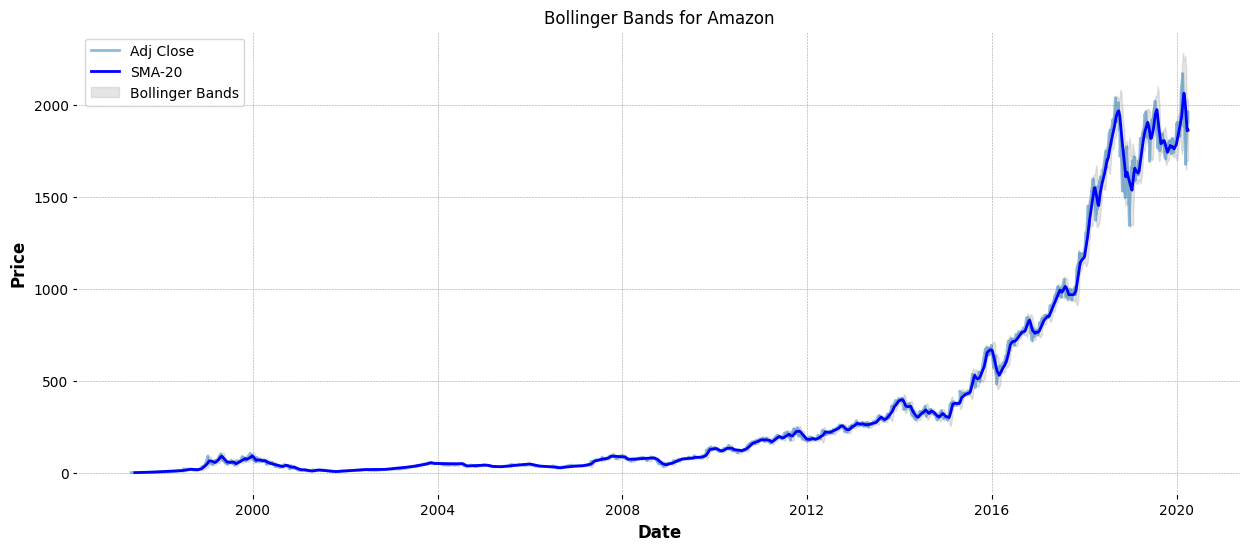

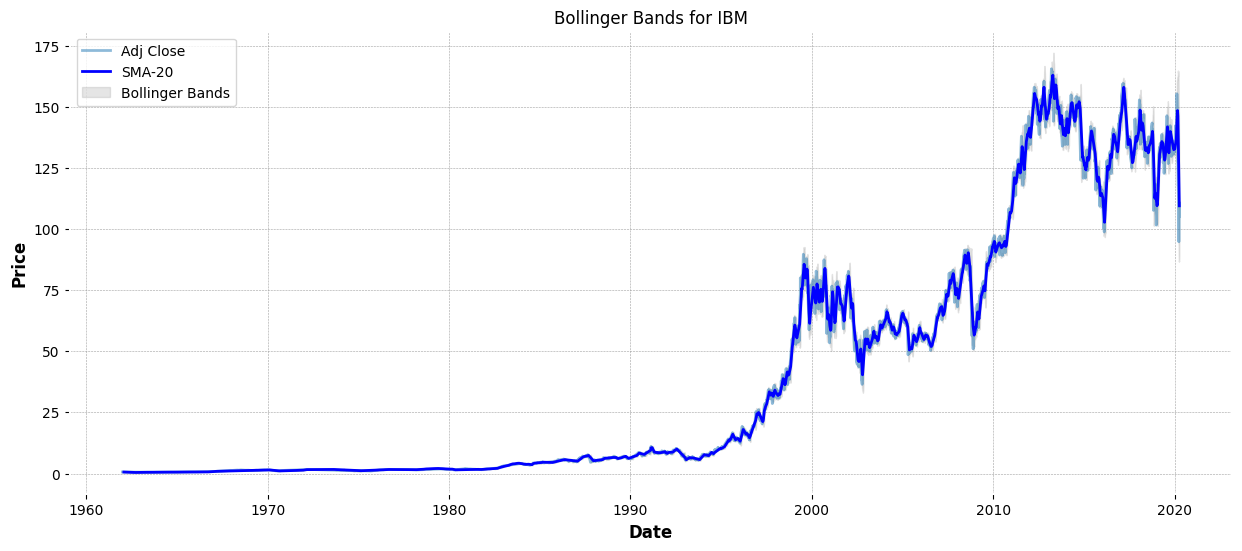

In [234]:
company_bbands = {}

for company in companies:
    company_data = stock[stock['Company'] == company].copy()
    company_data['SMA_20'] = company_data['Adj Close'].rolling(window=20).mean()
    company_data['Upper_Band'] = company_data['SMA_20'] + (company_data['Adj Close'].rolling(window=20).std() * 2)
    company_data['Lower_Band'] = company_data['SMA_20'] - (company_data['Adj Close'].rolling(window=20).std() * 2)
    company_bbands[company] = company_data

    # Plot Bollinger Bands
    plt.figure(figsize=(15, 6))
    plt.plot(company_data['Adj Close'], label='Adj Close', alpha=0.5)
    plt.plot(company_data['SMA_20'], label='SMA-20', color='blue')
    plt.fill_between(company_data.index, company_data['Upper_Band'], company_data['Lower_Band'], 
                     color='gray', alpha=0.2, label='Bollinger Bands')
    plt.title(f'Bollinger Bands for {company}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


# Correlation Analysis

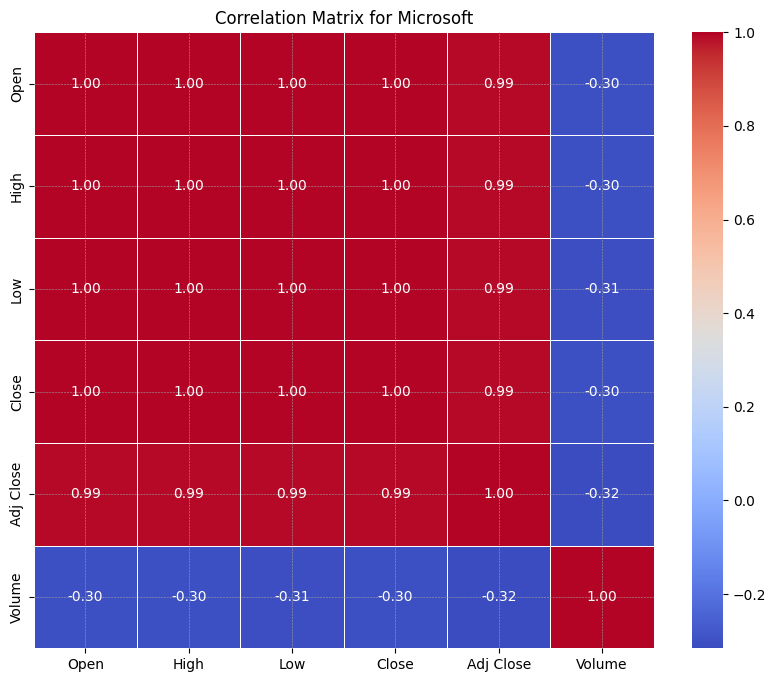

In [235]:
for company in companies:
    company_data = stock[stock['Company'] == company]

    # Calculate correlation matrix
    corr_matrix = company_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation Matrix for {company}')
    plt.show()


## Insights:-
* High correlation between Open, High, Low, and Close, as they are closely related daily price points.
* A low or inverse correlation between Volume and price may indicate low sensitivity of prices to trading activity or a possible lag effect.
* Positive correlation between Adj Close and Volume might suggest strong market interest. (IBM is positive; Microsoft and Amazon are negative)

### Pair Plots

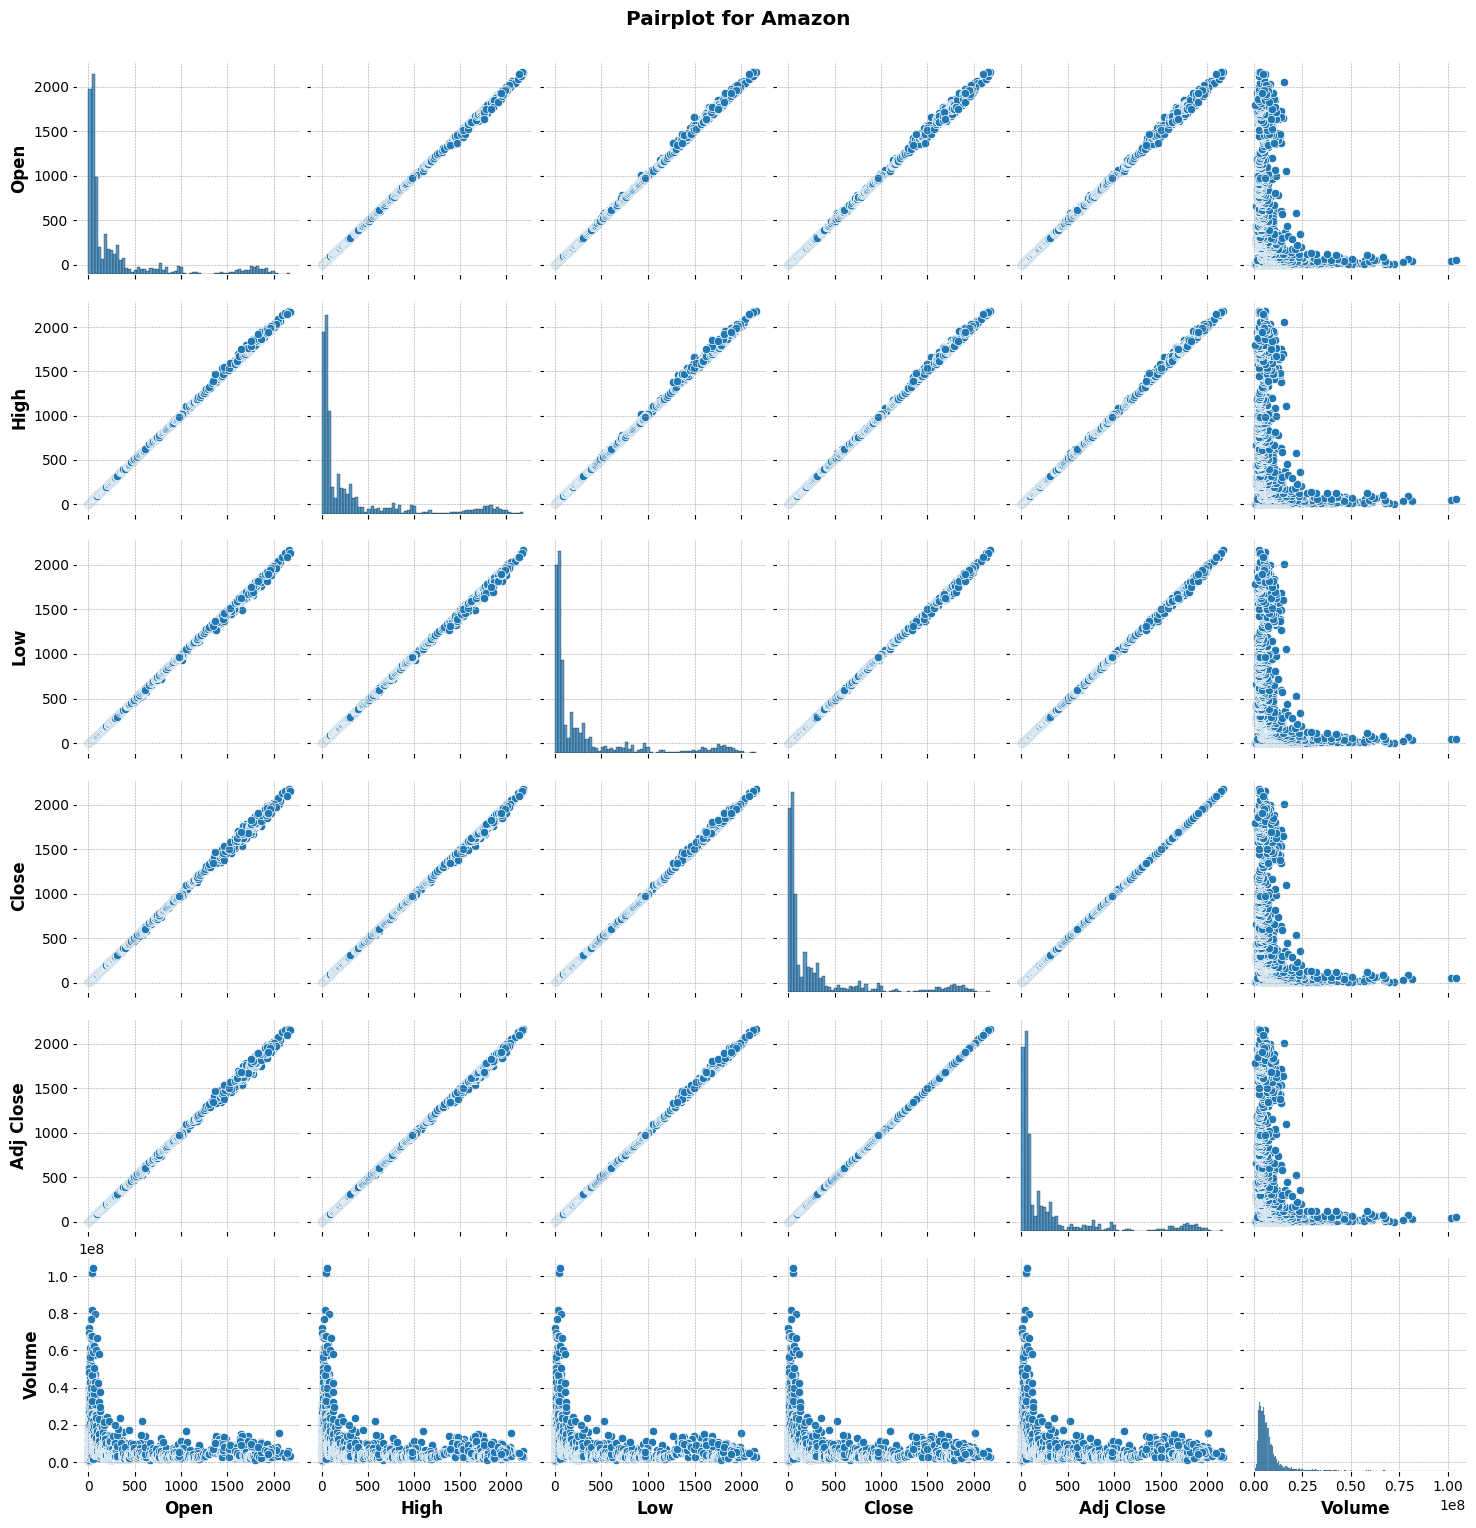

In [236]:
for company in companies:
    company_data = stock[stock['Company'] == company]

    # Plot pairplot
    sns.pairplot(company_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
    plt.suptitle(f'Pairplot for {company}', y=1.02)
    plt.show()


### Amazon
* High vs. Low Correlation:
There's a clear positive correlation between High and Low. As the High price increases, the Low price tends to increase similarly. This indicates a consistent price range on most days.
* Close vs. Open:
A strong linear relationship is observed between the Open and Close prices. The values align closely, suggesting that Amazon’s stock opens and closes at nearly the same levels most days.
* Volume vs. Price:
The Volume plot is skewed to the right, indicating that the majority of days have lower trading volumes, with occasional spikes. The relationship with Price isn’t immediately clear, but the large spread between Open/Close and High/Low suggests the presence of large price movements on days with high volume.

### IBM
* High vs. Low Correlation:

A similar correlation to Amazon, where High and Low have a strong positive relationship. This indicates that IBM's daily price fluctuation is consistent.
* Close vs. Open:

The Close and Open values for IBM are closely aligned, suggesting that IBM's opening and closing prices are similar on most days, just like Amazon.
* Volume vs. Price:

Volume shows some degree of correlation with price changes, especially in the scatter between Volume and Open/Close. The volume spikes at certain times, which may align with large price movements.

### Microsoft
* High vs. Low Correlation:

Strong positive correlation between High and Low. Microsoft shares behave similarly to Amazon and IBM, where higher highs tend to lead to higher lows.
* Close vs. Open:

Just like the other two stocks, Microsoft shows a strong linear relationship between the Open and Close prices, meaning the price movement during the day is relatively stable.
* Volume vs. Price:

The Volume plot is also skewed right for Microsoft. The Volume shows some influence on price movement, with certain days showing a higher price fluctuation when there is a spike in volume.
### General Insights Across All Three Companies:
* **Consistent Price Range:**

For all three companies, there’s a consistent relationship between High and Low prices, indicating stable intraday price movements.
* **Open and Close Prices:**

A strong correlation between Open and Close for all three companies suggests minimal difference between opening and closing prices, indicating either a stable or range-bound market for these stocks.
* **Volume Spikes:**

Trading volumes appear to be skewed to the right for all three stocks, which implies most trading days see low volume, but there are occasional spikes. These spikes may correspond to significant price movements or news events.
* **Volatility:**

The diagonal histograms indicate that there’s more volatility in the High and Low prices compared to the Open and Close prices, especially for Amazon, where the variation in price is more prominent.

### Cross-Company Correlation

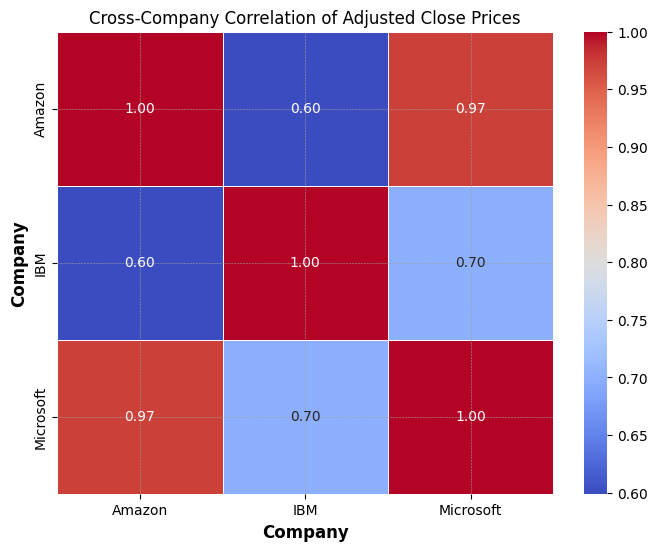

In [237]:
# Pivot data to create a matrix for cross-company correlation
cross_corr_data = stock.pivot_table(index='Date', columns='Company', values='Adj Close')

# Calculate cross-company correlation
cross_corr_matrix = cross_corr_data.corr()

# Plot heatmap for cross-company correlation
plt.figure(figsize=(8, 6))
sns.heatmap(cross_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Cross-Company Correlation of Adjusted Close Prices')
plt.show()

### Correlation with Volume
Check how trading volume correlates with price movement

Correlation between Volume and Daily Returns:
                 Volume  Daily Returns
Volume         1.000000      -0.027903
Daily Returns -0.027903       1.000000


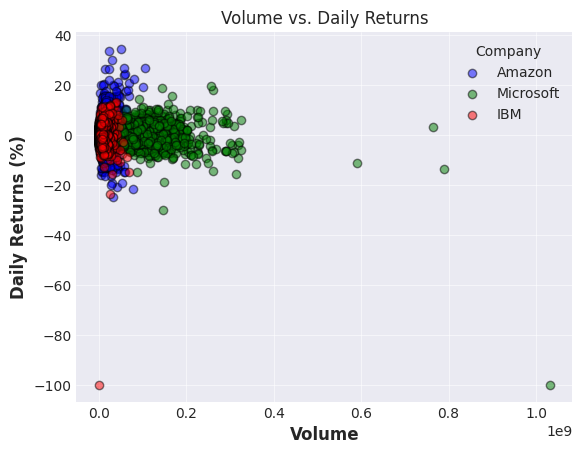

In [306]:
# Calculate Daily Returns
stock['Daily Returns'] = stock['Adj Close'].pct_change() * 100  # Change in percentage

# Compute the correlation between 'Volume' and 'Daily Returns'
correlation = stock[['Volume', 'Daily Returns']].corr()
print(f"Correlation between Volume and Daily Returns:\n{correlation}")

color_map = {'Amazon': 'blue', 'Microsoft': 'green', 'IBM': 'red'}

# Plot scatter plot for Volume vs. Daily Returns
for company, color in color_map.items():
    company_data = stock[stock['Company'] == company]
    plt.scatter(company_data['Volume'], company_data['Daily Returns'],
                alpha=0.5, color=color, edgecolor='black', label=company)

plt.title('Volume vs. Daily Returns')
plt.xlabel('Volume')
plt.ylabel('Daily Returns (%)')
plt.grid(True)
plt.legend(title='Company')

plt.show()

**Interpretation:**
* The correlation coefficient between Volume and Daily Returns is approximately -0.0279, suggesting that there is a very weak negative correlation between trading volume and daily returns. This indicates that, in this dataset, there isn't a strong relationship between the trading volume and the price movement (as represented by daily returns).

Correlation matrix for Amazon:
                 Volume  Daily Returns
Volume         1.000000       0.169269
Daily Returns  0.169269       1.000000
----------------------------------------
Correlation matrix for IBM:
                 Volume  Daily Returns
Volume         1.000000       0.001712
Daily Returns  0.001712       1.000000
----------------------------------------
Correlation matrix for Microsoft:
                 Volume  Daily Returns
Volume         1.000000      -0.126052
Daily Returns -0.126052       1.000000
----------------------------------------


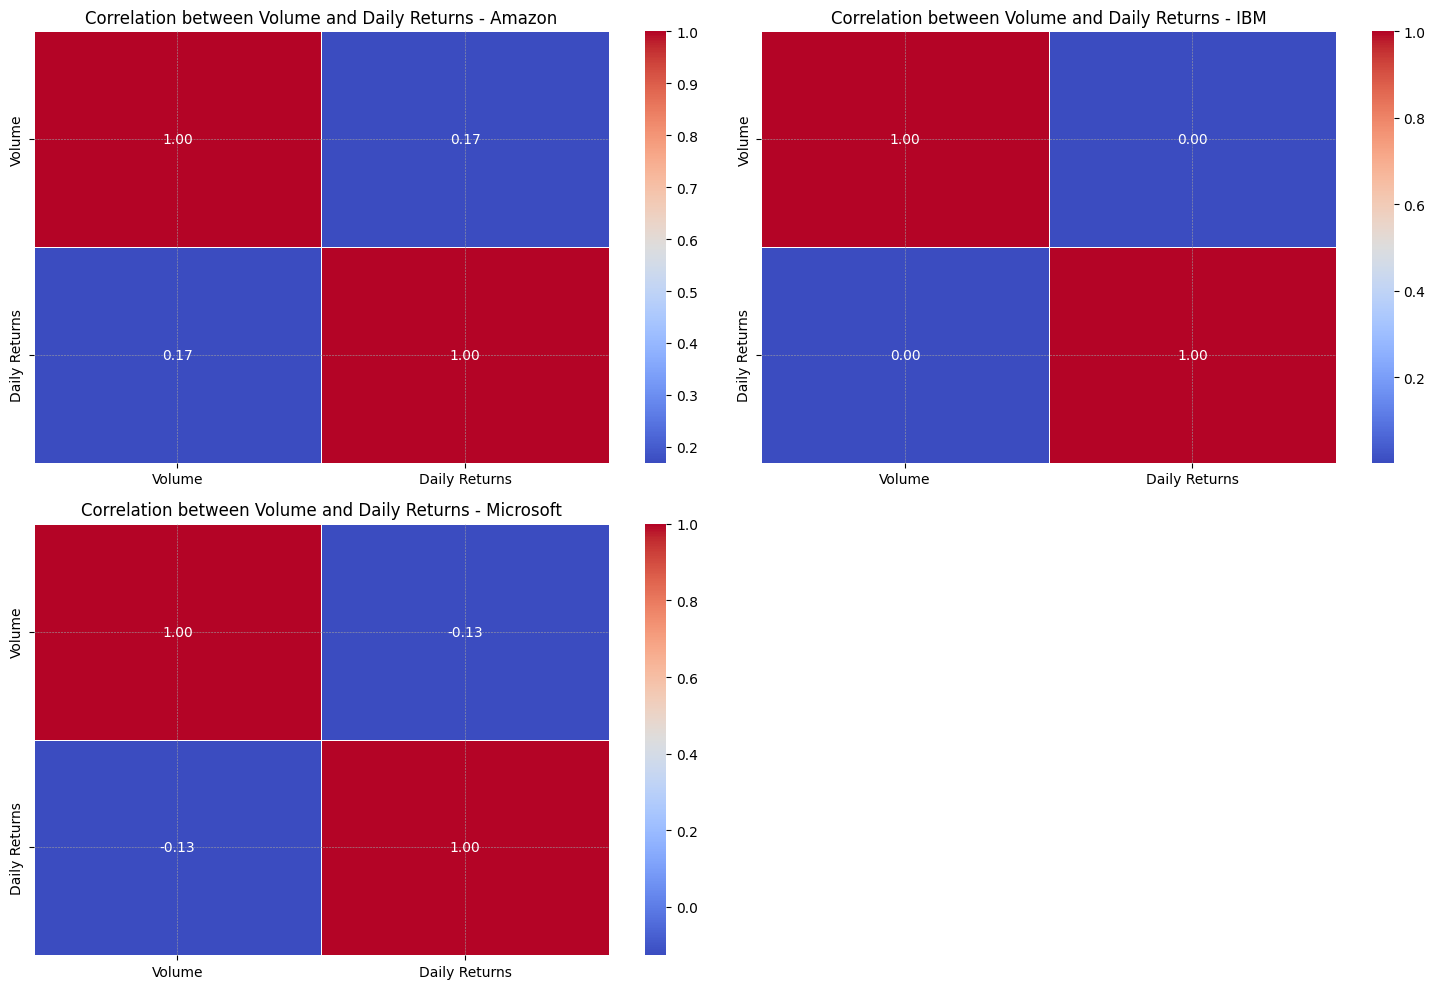

In [239]:
# List of companies you want to analyze
companies = stock['Company'].unique()

# Create a figure for plotting
plt.figure(figsize=(15, 10))

# Loop through each company and analyze correlation with Volume
for i, company in enumerate(companies, 1):
    company_data = stock[stock['Company'] == company]
    
    # Calculate the correlation matrix for Volume and Daily Returns
    corr_matrix = company_data[['Volume', 'Daily Returns']].corr()
    
    # Print the correlation for each company
    print(f"Correlation matrix for {company}:")
    print(corr_matrix)
    print("-" * 40)
    
    # Plot the correlation matrix as a heatmap
    plt.subplot(2, 2, i)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f'Correlation between Volume and Daily Returns - {company}')

plt.tight_layout()
plt.show()

# Identifying Seasonality and Cycles in Stock Prices
In stock market analysis, identifying seasonality and cycles can help you understand the recurring patterns in stock prices that occur over a specific period. Seasonality refers to price patterns that repeat at regular intervals (e.g., yearly or monthly), while cycles refer to longer-term fluctuations that may last years.

In [240]:
amzn = pd.read_csv('/kaggle/input/amazon/AMZN.csv')
ibm = pd.read_csv('/kaggle/input/stocks-ohlc/IBM.csv')
msft = pd.read_csv('/kaggle/input/stocks-ohlc/MSFT.csv')

# Add company name to each dataframe
amzn['Company'] = 'Amazon'
ibm['Company'] = 'IBM'
msft['Company'] = 'Microsoft'

# Concatenate all dataframes
stock = pd.concat([amzn, ibm, msft], axis=0)

# Check the column names and the first few rows to inspect the structure
print(stock.columns)  # Display column names
print(stock.head())   # Display first few rows

# If there is no 'Date' column, inspect the name and adjust accordingly
if 'Date' in stock.columns:
    stock['Date'] = pd.to_datetime(stock['Date'])
elif 'date' in stock.columns:
    stock['Date'] = pd.to_datetime(stock['date'])
else:
    raise ValueError("The dataset does not contain a valid 'Date' column.")

# Set Date as index for easier time series handling
stock.set_index('Date', inplace=True)

# List of companies to analyze
companies = stock['Company'].unique()

# Create a figure for plotting
plt.figure(figsize=(15, 10))

# Analyzing Seasonality and Cycles (Monthly, Weekly, Yearly Trend)
for company in companies:
    company_data = stock[stock['Company'] == company]
    
    # Resampling data to weekly, monthly, and yearly
    weekly_data = company_data['Adj Close'].resample('W').mean()
    monthly_data = company_data['Adj Close'].resample('M').mean()
    yearly_data = company_data['Adj Close'].resample('Y').mean()
    
    # Plotting trends for each company
    plt.figure(figsize=(15, 8))

    plt.subplot(3, 1, 1)
    weekly_data.plot(label='Weekly Trend', color='blue')
    plt.title(f'{company} - Weekly Trend')
    plt.ylabel('Adjusted Close Price')
    plt.legend()

    plt.subplot(3, 1, 2)
    monthly_data.plot(label='Monthly Trend', color='green')
    plt.title(f'{company} - Monthly Trend')
    plt.ylabel('Adjusted Close Price')
    plt.legend()

    plt.subplot(3, 1, 3)
    yearly_data.plot(label='Yearly Trend', color='red')
    plt.title(f'{company} - Yearly Trend')
    plt.ylabel('Adjusted Close Price')
    plt.legend()

    plt.tight_layout()
    plt.show()


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Company'],
      dtype='object')
         Date      Open      High       Low     Close  Adj Close    Volume  \
0  1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1  1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
2  1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
3  1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
4  1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

  Company  
0  Amazon  
1  Amazon  
2  Amazon  
3  Amazon  
4  Amazon  


<Figure size 1500x1000 with 0 Axes>

## Decompose Time Series Data
To identify seasonal trends and cycles more quantitatively, we can decompose the stock prices into:

* Trend: The long-term movement of the data.
* Seasonal Component: The repeating pattern (e.g., yearly seasonality).
* Residual Component: The noise in the data that cannot be explained by trend or seasonality.

<Figure size 1200x800 with 0 Axes>

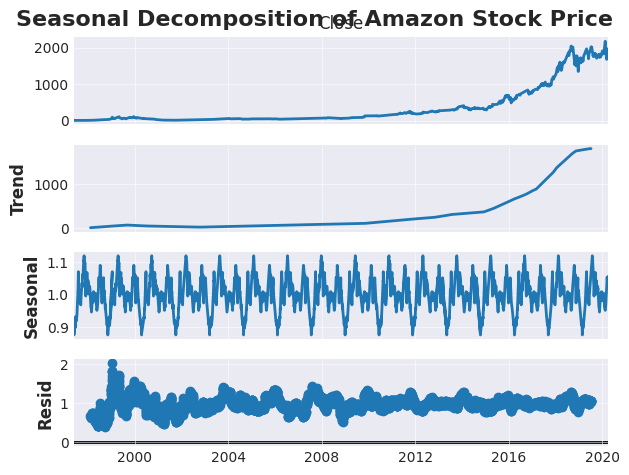

<Figure size 1200x800 with 0 Axes>

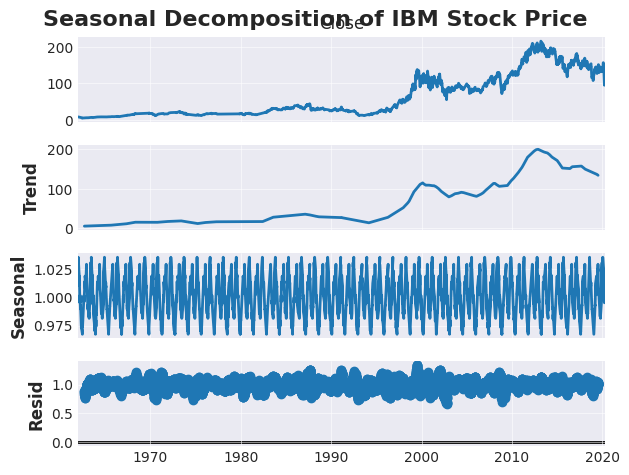

<Figure size 1200x800 with 0 Axes>

In [241]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose stock prices for each company
for company in companies:
    company_data = stock[stock['Company'] == company]
    company_close = company_data['Close']

    # Apply seasonal decomposition
    result = seasonal_decompose(company_close, model='multiplicative', period=365)

    # Plot the decomposition
    plt.figure(figsize=(12, 8))
    result.plot()
    plt.suptitle(f'Seasonal Decomposition of {company} Stock Price', fontsize=16)
    plt.show()


### Insights

* Observed (Top Panel):
    * This shows the actual stock prices over time.
    * Amazon exhibits a significant upward trend after 2010, indicating rapid growth.
    * IBM shows a peak around 2014 but declines afterward.
    * Microsoft displays steady growth, with a significant rise after 2010.
      
* Trend (Second Panel):
    * The trend captures the long-term direction of stock prices, filtering out noise.
    * Amazon and Microsoft have strong upward trends in later years, while IBM’s trend declines after peaking.
      
* Seasonal (Third Panel):
    * Represents recurring patterns within a fixed period (e.g., yearly or quarterly).
    * The seasonal patterns are consistent for all three companies, showing periodic fluctuations.
      
* Residual (Bottom Panel):
    * The residual represents the noise or irregular components after removing the trend and seasonal parts.
    * Amazon’s residuals show lower variability over time, indicating a stronger fit of the model in later years.
    * IBM and Microsoft residuals remain consistent, with some noticeable deviations.
      
------------------------------------------------------------------------------------------------------------------

1. **Amazon: Significant growth post-2010 with minimal irregularities.**
2. **IBM: Declining trend post-2014 despite consistent seasonal patterns.**
3. **Microsoft: Gradual growth until 2010, followed by a sharp increase, with stable seasonal trends.**


## Trend Detection
Identify long-term trends using moving averages (e.g., SMA or EMA for 50 and 200 days)

In [242]:
# List of companies to analyze
companies = stock['Company'].unique()

# Loop through each company
for company in companies:
    # Filter data for the current company
    company_data = stock[stock['Company'] == company]
    
    # Calculate 50-day and 200-day SMA for the current company
    company_data['SMA_50'] = company_data['Adj Close'].rolling(window=50).mean()
    company_data['SMA_200'] = company_data['Adj Close'].rolling(window=200).mean()
    
    # Detect Golden Cross (SMA_50 crosses above SMA_200)
    company_data['Golden_Cross'] = (company_data['SMA_50'] > company_data['SMA_200']) & (company_data['SMA_50'].shift(1) <= company_data['SMA_200'].shift(1))
    
    # Detect Death Cross (SMA_50 crosses below SMA_200)
    company_data['Death_Cross'] = (company_data['SMA_50'] < company_data['SMA_200']) & (company_data['SMA_50'].shift(1) >= company_data['SMA_200'].shift(1))
    
    # Plotting the price data along with the SMAs for the current company
    plt.figure(figsize=(14, 8))
    plt.plot(company_data['Adj Close'], label=f'{company} Adj Close', color='black', alpha=0.5)
    plt.plot(company_data['SMA_50'], label=f'{company} 50-Day SMA', color='blue')
    plt.plot(company_data['SMA_200'], label=f'{company} 200-Day SMA', color='red')

    # Highlight Golden Cross and Death Cross for the current company
    plt.plot(company_data[company_data['Golden_Cross']].index, company_data['SMA_50'][company_data['Golden_Cross']], '^', markersize=10, color='green', lw=0, label='Golden Cross')
    plt.plot(company_data[company_data['Death_Cross']].index, company_data['SMA_50'][company_data['Death_Cross']], 'v', markersize=10, color='red', lw=0, label='Death Cross')

    # Add labels and title for the current company's plot
    plt.title(f'{company} Stock Price with 50-Day and 200-Day SMAs and Trend Signals (Golden Cross & Death Cross)')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

## Daily return of the stock

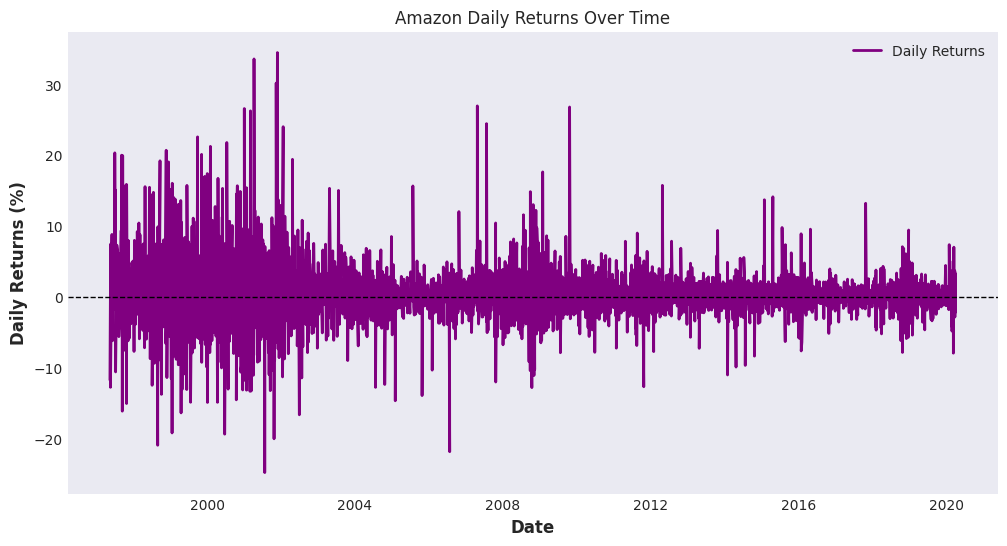

In [243]:
# Filter for the selected companies
companies = ['Amazon', 'IBM', 'Microsoft']
stock_filtered = stock[stock['Company'].isin(companies)]

# Calculate daily returns for all data
stock_filtered['Daily Returns'] = stock_filtered['Adj Close'].pct_change() * 100

# Iterate through each company and generate a line chart
for company in companies:
    # Filter data for the current company
    company_data = stock_filtered[stock_filtered['Company'] == company]
    
    # Plot daily returns as a line chart
    plt.figure(figsize=(12, 6))
    plt.plot(company_data.index, company_data['Daily Returns'], label='Daily Returns', color='purple')
    plt.axhline(0, linestyle='--', color='black', linewidth=1)  # Add a reference line at 0
    plt.title(f'{company} Daily Returns Over Time')
    plt.xlabel('Date')
    plt.ylabel('Daily Returns (%)')
    plt.legend()
    plt.grid()
    plt.show()

* **Amazon:**
    * **High Volatility:** Returns show significant fluctuations, especially between 2000 and 2010, indicating higher market risks.
    * **Post-2010 Stabilization:** Variability decreases after 2010, suggesting more consistent performance in later years.
* **IBM:**
    * **Lower Volatility:** Returns are more stable compared to Amazon, indicating less risk but potentially less opportunity for high gains.
    * **Negative Outliers:** There are a few sharp negative returns, especially in earlier decades, likely linked to market shocks or company-specific events.
* **Microsoft:**
    * **Moderate Volatility:** Returns are more volatile than IBM but less than Amazon.
    * **Consistent Fluctuations:** Peaks and troughs are distributed evenly over time, showing steady market activity.

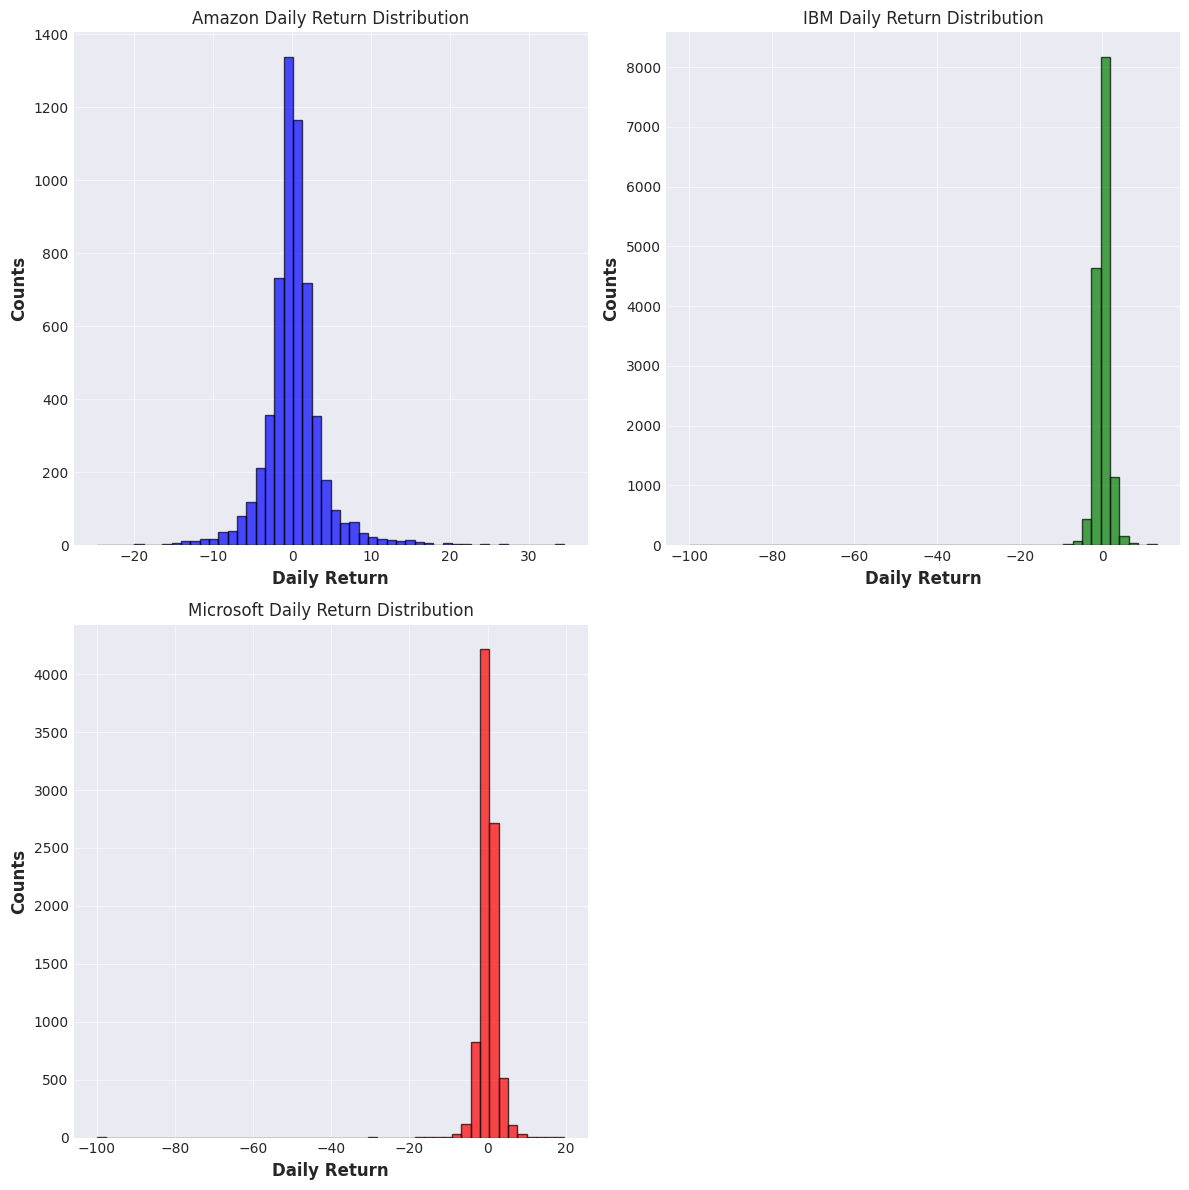

In [244]:
companies = ['Amazon', 'IBM', 'Microsoft']
colors = ['blue', 'green', 'red']

stock_filtered = stock[stock['Company'].isin(companies)]

# Calculate daily returns for all data
stock_filtered['Daily Returns'] = stock_filtered['Adj Close'].pct_change() * 100

plt.figure(figsize=(12, 12))

# Plot histograms for each company's daily return
for i, company in enumerate(companies, 1):
    
    # Filter data for the current company
    company_data = stock_filtered[stock_filtered['Company'] == company]
    
    # Create a subplot
    plt.subplot(2, 2, i)
    plt.hist(company_data['Daily Returns'].dropna(), bins=50, color=colors[i - 1], alpha=0.7, edgecolor='black')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company} Daily Return Distribution')

plt.tight_layout()
plt.show()

* **Amazon:**
    * The histogram is centered around 0, indicating that the majority of Amazon's daily returns are close to 0%.
    * The distribution appears roughly normal (bell-shaped), with a few days of higher positive or negative returns.
    * Extreme daily returns (e.g., -20% or +20%) are rare.

* **IBM:**
    * The histogram is sharply peaked near 0, suggesting that most of IBM's daily returns are very small or close to 0%.
    * There is an extremely wide range of potential returns, as evidenced by the extended x-axis scale (-100% to +100%), though such extreme events likely occur infrequently.
    * The higher frequency around 0% suggests IBM's daily returns are less volatile compared to the others.

* **Microsoft:**
    * Similar to Amazon, the histogram is centered around 0, but it appears more compressed, indicating relatively lower variability in daily returns.
    * Extreme positive or negative returns are uncommon, but the range is narrower than IBM.

---------------------------------------------------------------------------------------------------------------------------------

**GENERAL OBSERVATIONS:**
* **Volatility:** IBM's daily return range seems the widest, while Microsoft shows the narrowest spread.
* **Risk Profile:** The wider the range of daily returns, the riskier the stock tends to be. Based on the graphs, IBM might have higher extreme return events.
* **Normality:** The distributions for Amazon and Microsoft seem closer to a normal distribution, while IBM's might have some unique outliers or anomalies.

##  Momentum Indicators

### Relative Strength Index (RSI):

Measures the speed and change of price movements


In [245]:
for company in stock['Company'].unique():
    company_data = stock[stock['Company'] == company]
    
    # Calculate RSI for this company's data (as above)
    company_data['delta'] = company_data['Adj Close'].diff(1)
    company_data['gain'] = company_data['delta'].where(company_data['delta'] > 0, 0)
    company_data['loss'] = -company_data['delta'].where(company_data['delta'] < 0, 0)
    company_data['avg_gain'] = company_data['gain'].rolling(window=14).mean()
    company_data['avg_loss'] = company_data['loss'].rolling(window=14).mean()
    company_data['RS'] = company_data['avg_gain'] / company_data['avg_loss']
    company_data['RSI'] = 100 - (100 / (1 + company_data['RS']))

    # Update the main dataframe
    stock.loc[stock['Company'] == company, 'RSI'] = company_data['RSI']

In [246]:
stock.head()

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1997-05-15  2.437500  2.500000  1.927083  1.958333   1.958333  72156000   
1997-05-16  1.968750  1.979167  1.708333  1.729167   1.729167  14700000   
1997-05-19  1.760417  1.770833  1.625000  1.708333   1.708333   6106800   
1997-05-20  1.729167  1.750000  1.635417  1.635417   1.635417   5467200   
1997-05-21  1.635417  1.645833  1.375000  1.427083   1.427083  18853200   

           Company  RSI  
Date                     
1997-05-15  Amazon  NaN  
1997-05-16  Amazon  NaN  
1997-05-19  Amazon  NaN  
1997-05-20  Amazon  NaN  
1997-05-21  Amazon  NaN

In [247]:
# List of unique companies to iterate over
companies = stock['Company'].unique()

# Set the figure size for plotting
plt.figure(figsize=(14, 10))

# Iterate over each company and create a plot for each
for i, company in enumerate(companies, 1):
    company_data = stock[stock['Company'] == company]

    # Create a subplot for each company (2 rows, 1 column)
    plt.subplot(len(companies), 1, i)
    
    # Plot Adjusted Close Price
    plt.plot(company_data.index, company_data['Adj Close'], label=f'{company} Adjusted Close', color='blue', alpha=0.7)
    
    # Plot RSI (Add a horizontal line at 70 and 30 for overbought/oversold conditions)
    plt.plot(company_data.index, company_data['RSI'], label=f'{company} RSI', color='orange', alpha=0.7)
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

    # Add labels, title, and legend
    plt.xlabel('Date')
    plt.title(f'{company} - Adjusted Close and RSI')
    plt.legend(loc='upper left')
    
# Adjust the layout to make room for all subplots
plt.tight_layout()

# Show the plots
plt.show()

**AMAZON**
* The RSI oscillates between 0 and 100, with the overbought threshold at 70 (red dashed line) and oversold threshold at 30 (green dashed line).
* There are moments when the RSI breaches the 70 level, indicating overbought conditions (potentially overvalued), but these are generally short-lived.
* The RSI rarely dips below 30, showing fewer oversold periods.
---------------------------------------------------------------------------------------------------------------------------------
***Adjusted Close:** Amazon's stock price shows exponential growth, especially after 2010, with sharp increases up to 2020.*

**IBM**
* RSI fluctuates frequently within the 30-70 range, reflecting more frequent periods of short-term buying and selling pressure.
* There are many instances of overbought (>70) and oversold (<30) conditions, signaling a more volatile stock relative to its price movements.
---------------------------------------------------------------------------------------------------------------------------------
***Adjusted Close:** IBM's stock price increases steadily up until the late 1990s but becomes more volatile afterward. The price stabilizes and declines slightly after 2013, reflecting less dynamic growth compared to Amazon.*

**MICROSOFT**
* The RSI generally remains in the 30-70 range, with occasional breaches above 70 (overbought) and below 30 (oversold).
* This indicates that Microsoft is relatively stable, though it has moments of excessive buying or selling pressure.
-----------------------------------------------------------------------------------------------------------------------------------
***Adjusted Close:** Microsoft experiences gradual growth until the mid-2010s, followed by sharp increases, similar to Amazon but less steep.*

* **Amazon:** High growth in stock price with fewer RSI overbought/oversold signals, indicating sustained momentum.
* **IBM:** Flatter price growth and frequent RSI oscillations suggest more short-term trading activity and volatility.
* **Microsoft:** Stable but increasing stock price, with RSI behavior reflecting consistent market trends with occasional spikes in buying/selling pressure.

## Drawdowns

In [248]:
# Calculate daily returns
stock['Daily Returns'] = stock['Adj Close'].pct_change() * 100

# Calculate cumulative returns
stock['Cumulative Returns'] = (1 + stock['Daily Returns'] / 100).cumprod()

# Calculate drawdown (decline from peak to trough)
stock['Drawdown'] = stock['Cumulative Returns'] / stock['Cumulative Returns'].cummax() - 1

In [249]:
# List of unique companies to iterate over
companies = stock['Company'].unique()

# Set the figure size for plotting
plt.figure(figsize=(14, 10))

# Iterate over each company and create a plot for each
for i, company in enumerate(companies, 1):
    company_data = stock[stock['Company'] == company]

    # Create a subplot for each company (1 row, 1 column)
    plt.subplot(len(companies), 1, i)
    
    # Plot Cumulative Returns
    plt.plot(company_data.index, company_data['Cumulative Returns'], label=f'{company} Cumulative Returns', color='blue', alpha=0.7)
    
    # Plot Drawdown
    plt.plot(company_data.index, company_data['Drawdown'], label=f'{company} Drawdown', color='red', alpha=0.7)
    
    # Add labels, title, and legend
    plt.xlabel('Date')
    plt.title(f'{company} - Cumulative Returns and Drawdown')
    plt.legend(loc='upper left')

# Adjust the layout to make room for all subplots
plt.tight_layout()

# Show the plots
plt.show()

**AMAZON**
* *Cumulative Returns:*
Amazon's cumulative returns have grown exponentially, especially after 2010. This indicates exceptional long-term growth, with the returns increasing dramatically compared to the initial investment.
* *Drawdown:*
    * Drawdown measures the percentage decline from the highest cumulative return.
    * Amazon experiences occasional drawdowns (red dips), such as during the dot-com bubble (early 2000s) and market corrections. However, the drawdowns are relatively short-lived compared to the overall growth trajectory.
----------------------------------------------------------------------------------------------------------------------------------**IBM**
* *Cumulative Returns:*
IBM's cumulative returns show steady growth until around 2013, after which growth plateaus. The company appears to have underperformed relative to Amazon and Microsoft in recent years.
* *Drawdown:*
IBM exhibits more persistent and significant drawdowns, especially post-2013, reflecting periods of declining stock value and lower recovery rates compared to Amazon.
---------------------------------------------------------------------------------------------------------------------------------
**Microsoft**
* *Cumulative Returns:*
Microsoft's returns grow steadily until around 2015, after which they accelerate significantly. The rapid increase in cumulative returns suggests strong performance in the latter half of the observed period.
* *Drawdown:*
Microsoft experiences periodic drawdowns, notably during the dot-com bubble and the 2008 financial crisis. However, similar to Amazon, these drawdowns are temporary, and the stock consistently recovers and surpasses previous highs.

--------------------------------------------------------------------------------------------------------------------------------
* **Amazon:** Exceptional long-term performance with significant cumulative returns and relatively low, short-lived drawdowns.
A strong choice for growth-oriented investors.
* **IBM:**
Underwhelming long-term growth with more persistent drawdowns.
Appears riskier with limited upside potential based on recent performance.
* **Microsoft:**
Strong growth, particularly after 2015, with a good balance of high returns and manageable drawdowns.
Suitable for investors seeking a combination of growth and stability.

## Sharpe Ratio
The Sharpe Ratio is a measure of risk-adjusted return, which allows you to compare the performance of an investment (like a stock) to its volatility (or risk). The higher the Sharpe ratio, the better the risk-adjusted return.

In [250]:
import numpy as np

# Assuming 'stock' DataFrame contains the 'Company' column and 'Close' prices

# Define the risk-free rate (you can adjust this value based on actual data)
risk_free_rate = 0.02 / 252  # Assuming a 2% annual risk-free rate, and daily returns

# Calculate daily returns for each company
stock['Daily_Return'] = stock['Close'].pct_change()

# Create a function to calculate Sharpe Ratio for each company
def calculate_sharpe_ratio(company_data, risk_free_rate):
    # Calculate the average daily return and standard deviation of returns
    avg_return = company_data['Daily_Return'].mean()
    std_deviation = company_data['Daily_Return'].std()
    
    # Calculate the Sharpe Ratio
    sharpe_ratio = (avg_return - risk_free_rate) / std_deviation
    return sharpe_ratio

# Calculate Sharpe Ratio for each company
companies = stock['Company'].unique()
sharpe_ratios = {}

for company in companies:
    company_data = stock[stock['Company'] == company]
    sharpe_ratios[company] = calculate_sharpe_ratio(company_data, risk_free_rate)

# Display Sharpe Ratios for each company
sharpe_ratios


{'Amazon': 0.04819170219741991,
 'IBM': 0.008847110588977464,
 'Microsoft': 0.03711337158797147}

* **Amazon:** Offers the best return per unit of risk, making it a strong choice for growth-oriented investors willing to take on some volatility.
* **Microsoft:** A solid option for those seeking a balance of growth and stability, with relatively strong risk-adjusted returns.
* **IBM:** Underperforms significantly in risk-adjusted terms, suggesting that it may not be an ideal choice unless other factors (e.g., dividend yield, specific market outlook) make it appealing.

In [251]:
# List of unique companies to iterate over
companies = stock['Company'].unique()

# Create an empty dictionary to store Sharpe ratios for each company
sharpe_ratios = {}

# Calculate Sharpe ratio for each company
for company in companies:
    company_data = stock[stock['Company'] == company]
    mean_return = company_data['Daily Returns'].mean()
    std_dev = company_data['Daily Returns'].std()
    sharpe_ratios[company] = mean_return / std_dev

# Plotting the Sharpe Ratio for each company
plt.figure(figsize=(10, 6))
plt.bar(sharpe_ratios.keys(), sharpe_ratios.values(), color='skyblue')
plt.title('Sharpe Ratio for Different Companies')
plt.xlabel('Company')
plt.ylabel('Sharpe Ratio')
plt.show()

# How much value do we put at risk by investing in a particular stock?

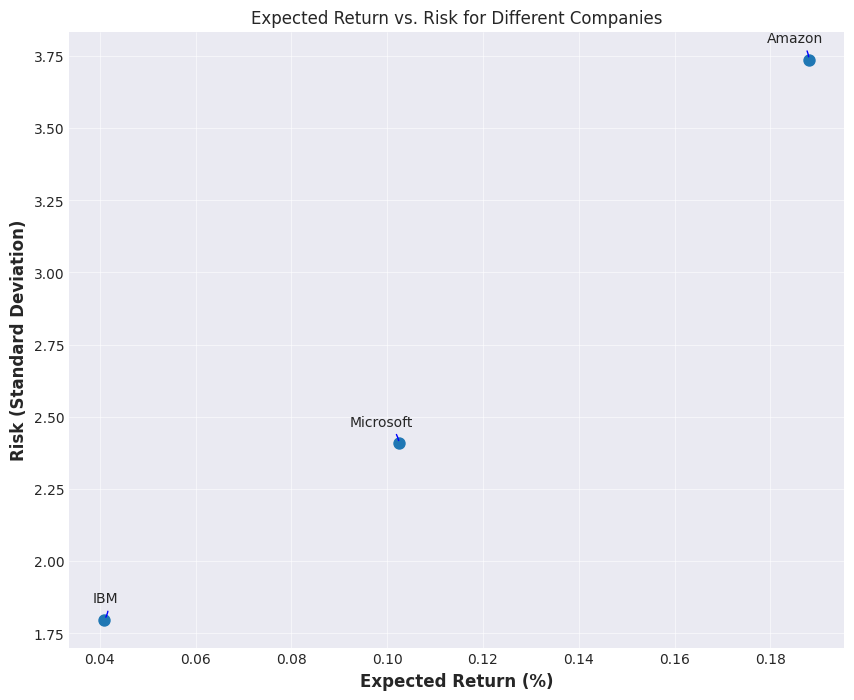

In [252]:
# Calculate daily returns if not already calculated
stock['Daily Returns'] = stock['Adj Close'].pct_change() * 100

# Remove NaN values for calculations
rets = stock.groupby('Company')['Daily Returns'].apply(lambda x: x.dropna())

# Create a figure
plt.figure(figsize=(10, 8))

# Calculate mean return and standard deviation (risk) for each company
mean_returns = rets.groupby('Company').mean()
std_returns = rets.groupby('Company').std()

# Scatter plot for expected return vs. risk
area = np.pi * 20  # Size of points
plt.scatter(mean_returns, std_returns, s=area)

# Labels and titles
plt.xlabel('Expected Return (%)')
plt.ylabel('Risk (Standard Deviation)')

# Annotate each point with the company name
for label, x, y in zip(mean_returns.index, mean_returns, std_returns):
    plt.annotate(label, xy=(x, y), xytext=(10, 10), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Show the plot
plt.title('Expected Return vs. Risk for Different Companies')
plt.show()

1. **Risk vs. Return Relationship:**

* Amazon has the highest expected return (~18%) but also the highest risk (standard deviation ~3.75).

* IBM has the lowest expected return ( ~4%) and the lowest risk ( ~1.75).

* Microsoft falls in the middle with a moderate expected return ( ~10%) and a moderate risk ( ~2.5).




2. **Trade-Offs:**

* Investors looking for high returns might be attracted to Amazon but must be willing to accept a higher risk.

* Conservative investors might prefer IBM due to its lower risk, even though the returns are also lower.

* Microsoft offers a balanced option with moderate risk and return.

In [253]:
from scipy.stats import norm

# List of companies
companies = ['Amazon', 'IBM', 'Microsoft']

# Function to calculate Risk Metrics for each company
def calculate_risk_metrics(stock_data, company_name):
    # Filter stock data for the company
    company_data = stock_data[stock_data['Company'] == company_name]
    
    # Calculate daily returns
    company_data['Daily_Return'] = company_data['Close'].pct_change()
    
    # Calculate mean and standard deviation of returns
    mean_return = company_data['Daily_Return'].mean()
    std_deviation = company_data['Daily_Return'].std()
    
    # Calculate VaR at 95% confidence level
    z_score = norm.ppf(0.95)
    VaR = mean_return + z_score * std_deviation
    
    # Calculate Expected Shortfall (average loss beyond VaR)
    tail_losses = company_data[company_data['Daily_Return'] < VaR]['Daily_Return']
    ES = tail_losses.mean()
    
    # Print the results
    print(f"\nRisk Metrics for {company_name}:")
    print(f"Volatility (Standard Deviation of Returns): {std_deviation:.4f}")
    print(f"Value at Risk (VaR) at 95% confidence level: {VaR:.4f}")
    print(f"Expected Shortfall (ES): {ES:.4f}")

# Calculate and display Risk Metrics for each company
for company in companies:
    calculate_risk_metrics(stock, company)



Risk Metrics for Amazon:
Volatility (Standard Deviation of Returns): 0.0374
Value at Risk (VaR) at 95% confidence level: 0.0634
Expected Shortfall (ES): -0.0031

Risk Metrics for IBM:
Volatility (Standard Deviation of Returns): 0.0159
Value at Risk (VaR) at 95% confidence level: 0.0265
Expected Shortfall (ES): -0.0014

Risk Metrics for Microsoft:
Volatility (Standard Deviation of Returns): 0.0216
Value at Risk (VaR) at 95% confidence level: 0.0365
Expected Shortfall (ES): -0.0014


**Insights from the Risk Metrics:**
* Volatility tells you how much the stock price fluctuates over a period. A higher volatility indicates higher risk.
* VaR (Value at Risk) gives you the estimated potential loss under normal market conditions. The larger the VaR value, the higher the risk.
* Expected Shortfall (ES) provides you with insight into the losses beyond VaR. If ES is large, it indicates that extreme losses could be significant.

# Cumulative Return

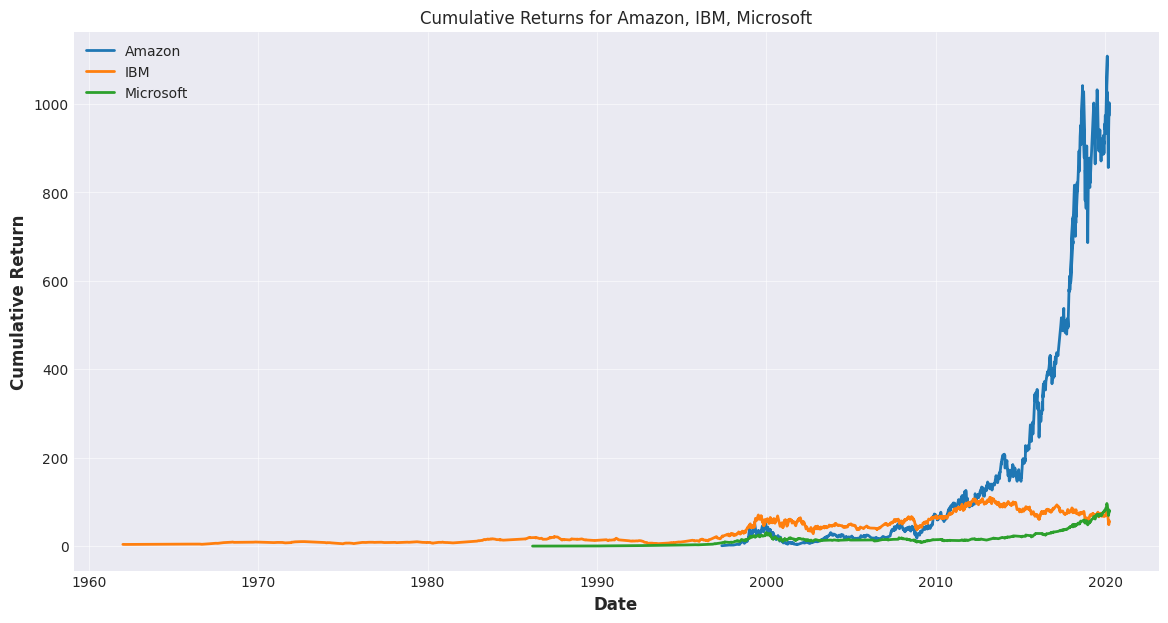

In [254]:
stock['Cumulative_Return'] = (1 + stock['Daily_Return']).cumprod()

# Plot cumulative returns for each company
plt.figure(figsize=(14, 7))
companies = ['Amazon', 'IBM', 'Microsoft']
for company in companies:
    plt.plot(stock[stock['Company'] == company].index, stock[stock['Company'] == company]['Cumulative_Return'], label=company)

plt.title('Cumulative Returns for Amazon, IBM, Microsoft')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


1. **Long-term Growth:**

* Amazon exhibits a dramatic increase in cumulative returns, particularly after 2010, suggesting exceptional performance in recent years.

* Others show more modest and steady growth over the years.



2. **Market Phases:**

* From 1960 to around 1990, cumulative returns for all investments were relatively flat, indicating minimal growth during this period.

* A sharp increase in cumulative returns for Amazon after 2000 suggests a period of rapid expansion or increased popularity.



3. **Investment Potential:**

* The steepest growth line, Amazon indicates the investment with the best historical performance, but it might also be associated with higher volatility and risk.

* The lower, flatter lines could represent safer investments with slower, steadier returns over time.

# Creating Lagged Features

In [259]:
# Define the number of lags (e.g., 1, 2, 5 days lag)
lags = [1, 2, 5]

# Create lagged features
for lag in lags:
    company_data[f'Close_lag_{lag}'] = company_data['Close'].shift(lag)

# Drop rows with NaN values due to lagging
company_data = company_data.dropna()

# Check the new dataset with lagged features
company_data.head()


Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1986-04-02  0.094618  0.097222  0.094618  0.095486   0.061264  27014400   
1986-04-03  0.096354  0.098958  0.096354  0.096354   0.061821  23040000   
1986-04-04  0.096354  0.097222  0.096354  0.096354   0.061821  26582400   
1986-04-07  0.096354  0.097222  0.092882  0.094618   0.060707  16560000   
1986-04-08  0.094618  0.097222  0.094618  0.095486   0.061264  10252800   

              Company        RSI  Daily Returns  Cumulative Returns  Drawdown  \
Date                                                                            
1986-04-02  Microsoft  46.666668       0.917402            0.031284 -0.999972   
1986-04-03  Microsoft  48.387142       0.909117            0.031568 -0.999972   
1986-04-04  Microsoft  40.740628       0.000000            0.031568 -0.999972   
1986-04-07  Microsoft  33.333251      -1.801798            0.031000 -0.999972   
1986-04-08  Microsoft  39.999893       0.917402            0.031284 -0.999972   

            Daily_Return  Close_lag_1  Close_lag_2  Close_lag_5  
Date                                                             
1986-04-02      0.009174     0.094618     0.095486     0.092014  
1986-04-03      0.009091     0.095486     0.094618     0.094618  
1986-04-04      0.000000     0.096354     0.095486     0.096354  
1986-04-07     -0.018018     0.096354     0.096354     0.095486  
1986-04-08      0.009174     0.094618     0.096354     0.094618

# Stationary Check

In [19]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The series is stationary!")
    else:
        print("The series is non-stationary!")
        
# Apply ADF test on the 'Close' price
adf_test(company_data['Close'])


ADF Statistic: 4.322345821566918
p-value: 1.0
The series is non-stationary!


**ADF Statistic (4.318):** A positive value like this often indicates a trend or non-stationarity in the series.
**p-value (1.0):** A very high p-value (greater than 0.05) confirms that we fail to reject the null hypothesis of the test, which states that the series is non-stationary.

---------------------------------------------------------------------------------------------------------------------------------
A non-stationary series has properties (e.g., mean, variance, autocorrelation) that change over time, making it unsuitable for many statistical and machine learning models that require stationarity.
Trends, seasonality, or structural breaks may be present in the data.

# Differencing (As Non-Stationary)
Differencing removes the trend or seasonal patterns in the data by subtracting the previous observation from the current one, stabilizing the mean over time.

In [20]:
# Apply differencing if the series is non-stationary
company_data['Close_diff'] = company_data['Close'].diff()

# Drop the NaN row resulting from differencing
company_data = company_data.dropna()

# Apply ADF test again to check for stationarity
adf_test(company_data['Close_diff'])

ADF Statistic: -16.903695408375388
p-value: 1.0231006230528932e-29
The series is stationary!


After applying first-order differencing, the series no longer has a changing mean or trend, making it suitable for modeling methods that require stationarity.

<Axes: title={'center': 'Differenced Series'}, xlabel='Date'>

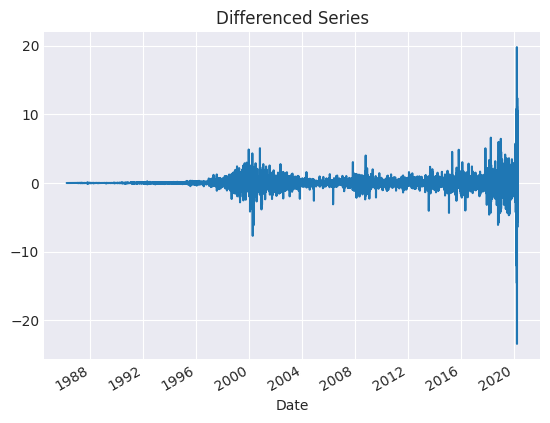

In [21]:
company_data['Close_diff'].plot(title="Differenced Series")

# Stock Price Prediction Using GRU 

In [262]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

In [263]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

5411/5411 ━━━━━━━━━━━━━━━━━━━━ 203s 37ms/step - loss: 9.2205e-04
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step
Evaluation metrics for Amazon:
RMSE for Train data: 32.1644357747852
MSE for Train data: 1034.5509287102816
MAE for Train data: 22.839813551420946
Explained Variance (Train): 0.9992366892229966
Explained Variance (Test): 0.9158885154158215
R2 score (Train): 0.9985150113715124
R2 score (Test): 0.9113701292206307
-------------------------------------------------------------------------------------


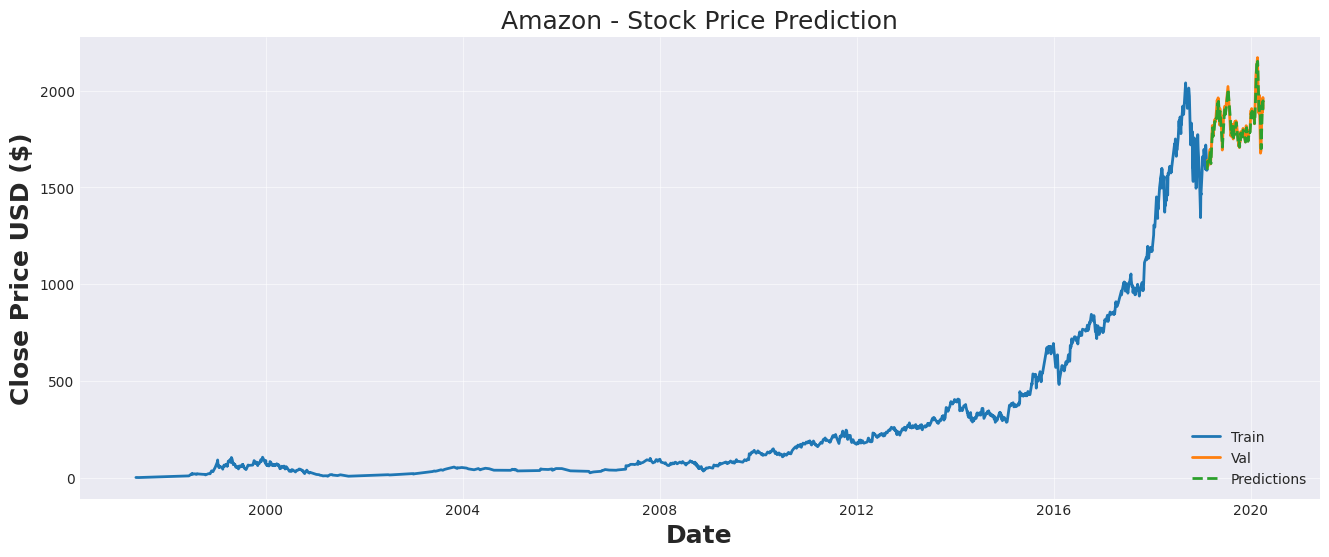

8095/8095 ━━━━━━━━━━━━━━━━━━━━ 305s 37ms/step - loss: 2.8040e-04
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
Evaluation metrics for Microsoft:
RMSE for Train data: 9.958062959927021
MSE for Train data: 99.16301791387052
MAE for Train data: 8.918463344618434
Explained Variance (Train): 0.9956819290792007
Explained Variance (Test): 0.9546012681931222
R2 score (Train): 0.9943178754361154
R2 score (Test): 0.7834535972594692
-------------------------------------------------------------------------------------


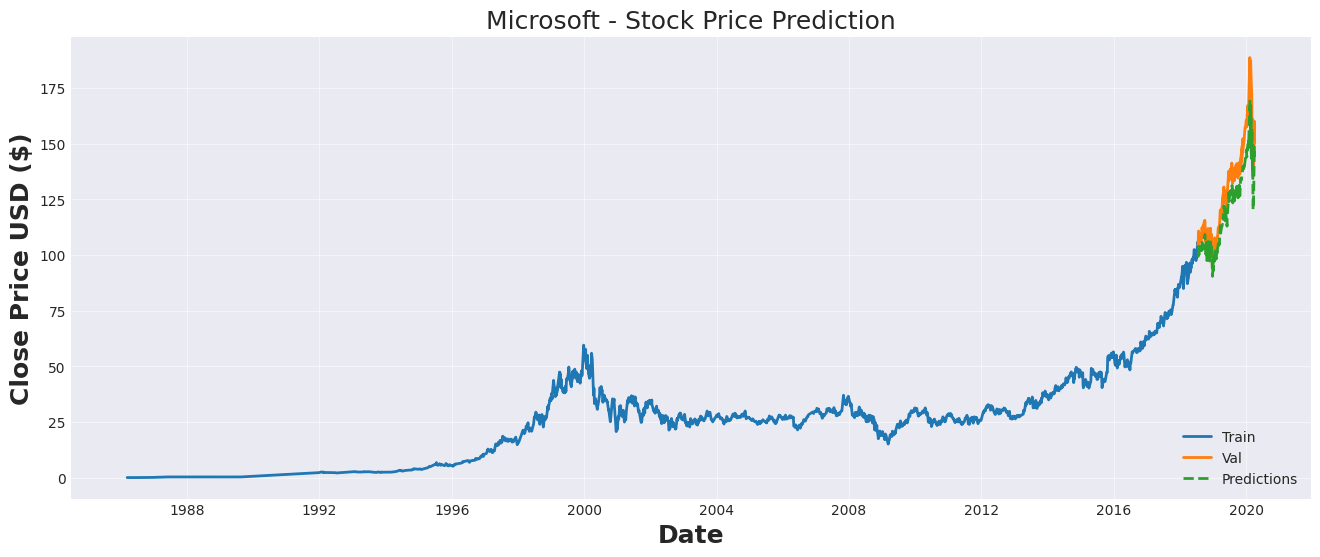

13870/13870 ━━━━━━━━━━━━━━━━━━━━ 515s 37ms/step - loss: 5.8393e-04
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
434/434 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step
434/434 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step
Evaluation metrics for IBM:
RMSE for Train data: 2.8523244385487767
MSE for Train data: 8.135754702742593
MAE for Train data: 2.3065986477174016
Explained Variance (Train): 0.9984158635060641
Explained Variance (Test): 0.9641012901516602
R2 score (Train): 0.99825564759805
R2 score (Test): 0.9423817076155843
-------------------------------------------------------------------------------------


In [264]:
# List of companies
companies = ['Amazon', 'Microsoft', 'IBM']

# Loop through each company to train and plot the model
for company in companies:
    # Filter data for the current company
    company_data = stock[stock['Company'] == company]

    # Extract the 'Close' prices
    close = company_data.filter(['Close'])

    # Convert to numpy array
    dataset = close.values

    # Get the number of rows to train the model on
    training_data_len = int(np.ceil(len(dataset) * .95))  # 95% for training, 5% for testing

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Create the training data set
    train_data = scaled_data[0:int(training_data_len), :]

    # Split into X_train and Y_train
    x_train = []
    y_train = []
    for i in range(60, len(train_data)):
        x_train.append(train_data[i - 60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the GRU model
    model = Sequential()
    model.add(GRU(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(GRU(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile and train the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1)

    # Create the testing data set
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i - 60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Get model predictions
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    explained_variance_train = explained_variance_score(y_train, model.predict(x_train))
    explained_variance_test = explained_variance_score(y_test, predictions)
    r2_train = r2_score(y_train, model.predict(x_train))
    r2_test = r2_score(y_test, predictions)

    print(f"Evaluation metrics for {company}:")
    print(f"RMSE for Train data: {rmse}")
    print(f"MSE for Train data: {mse}")
    print(f"MAE for Train data: {mae}")
    print(f"Explained Variance (Train): {explained_variance_train}")
    print(f"Explained Variance (Test): {explained_variance_test}")
    print(f"R2 score (Train): {r2_train}")
    print(f"R2 score (Test): {r2_test}")
    print("-------------------------------------------------------------------------------------")


    # Plotting for the current company
    train = close[:training_data_len]
    valid = close[training_data_len:]
    valid['Predictions'] = predictions

    # Create plot for the current company
    plt.figure(figsize=(16, 6))
    plt.title(f'{company} - Stock Price Prediction', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train.index, train['Close'], label='Train')
    plt.plot(valid.index, valid['Close'], label='Val')
    plt.plot(valid.index, valid['Predictions'], label='Predictions', linestyle='--')
    plt.legend(loc='lower right')
    plt.show()

# Comparision of original stock close price and predicted close price

In [265]:
valid

Close  Predictions
Date                               
2017-05-04  159.050003   156.327133
2017-05-05  155.050003   156.681107
2017-05-08  153.029999   152.968811
2017-05-09  152.110001   151.028442
2017-05-10  151.250000   150.198456
...                ...          ...
2020-03-26  112.889999   104.558273
2020-03-27  108.029999   110.614525
2020-03-30  112.930000   107.064621
2020-03-31  110.930000   111.192940
2020-04-01  105.139999   109.982491

[733 rows x 2 columns]

# Future Prediction

## For given Day

In [271]:
from datetime import datetime, timedelta

# Function to predict stock price for a specific date
def predict_price(company, date, model, scaler, close_data):
    try:
        # Convert the date to datetime format
        target_date = datetime.strptime(date, '%Y-%m-%d')
        
        # Ensure the target_date is valid (future date)
        if target_date <= close_data.index[-1]:
            print("Error: Please input a future date.")
            return

        # Use the last 60 days of data to predict
        last_60_days = close_data[-60:].values
        scaled_data = scaler.transform(last_60_days)

        # Prepare the input for the model
        x_input = [scaled_data]
        x_input = np.array(x_input)
        x_input = np.reshape(x_input, (x_input.shape[0], x_input.shape[1], 1))

        # Predict the price
        predicted_price = model.predict(x_input)
        predicted_price = scaler.inverse_transform(predicted_price)
        print(f"\nPredicted price of {company} on {date}: ${predicted_price[0][0]:.2f}")
    except ValueError:
        print("Invalid date format. Please use YYYY-MM-DD.")

# User input
company = input("Enter the company name (Amazon, Microsoft, IBM): ")
if company not in companies:
    print("Invalid company. Please choose from the listed companies.")
else:
    date = input("Enter the date for prediction (YYYY-MM-DD): ")
    company_data = stock[stock['Company'] == company]
    close_data = company_data.filter(['Close'])
    predict_price(company, date, model, scaler, close_data)


Enter the company name (Amazon, Microsoft, IBM):  Amazon
Enter the date for prediction (YYYY-MM-DD):  2024-12-28


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Predicted price of Amazon on 2024-12-28: $579.29


## Trend

Enter the company name (Amazon, Microsoft, IBM):  Microsoft
Enter the number of future days for prediction:  365


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

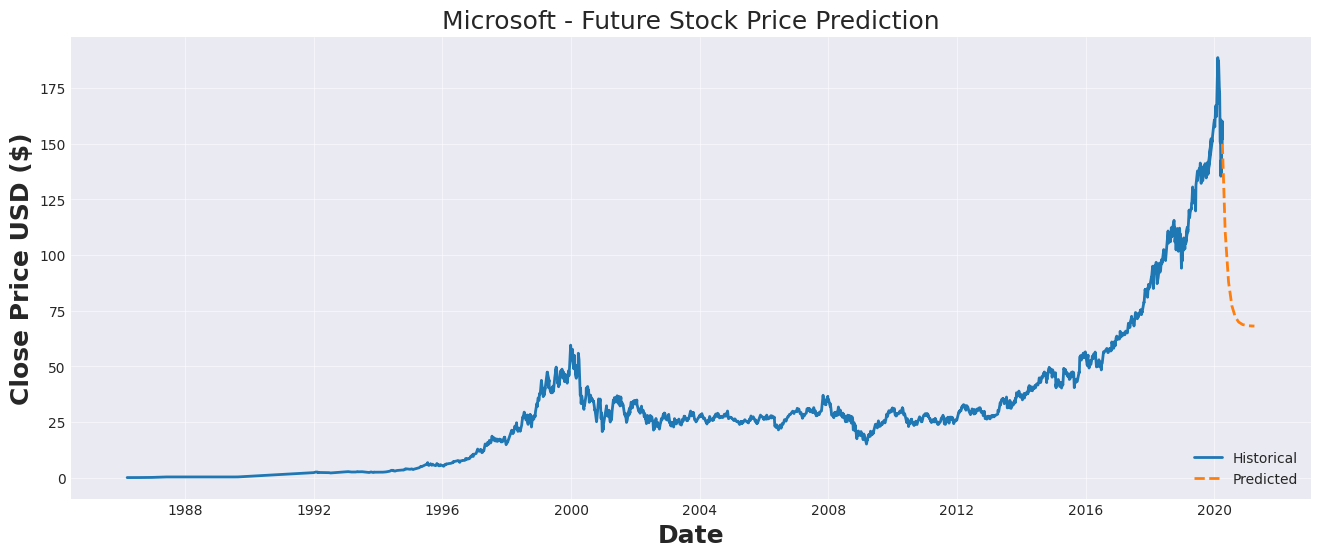

In [275]:
from datetime import timedelta

# Function to predict the stock prices for future dates
def predict_future_curve(company, model, scaler, close_data, days_to_predict):
    # Get the last 60 days of data
    last_60_days = close_data[-60:].values
    scaled_data = scaler.transform(last_60_days)

    # Predict future prices
    predictions = []
    input_data = scaled_data
    for _ in range(days_to_predict):
        x_input = np.reshape(input_data, (1, input_data.shape[0], 1))
        predicted_price = model.predict(x_input)
        predictions.append(predicted_price[0][0])
        input_data = np.append(input_data[1:], predicted_price, axis=0)

    # Inverse transform the predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Generate future dates
    last_date = close_data.index[-1]
    future_dates = [last_date + timedelta(days=i) for i in range(1, days_to_predict + 1)]

    # Plot the predictions
    plt.figure(figsize=(16, 6))
    plt.title(f'{company} - Future Stock Price Prediction', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(close_data.index, close_data['Close'], label='Historical')
    plt.plot(future_dates, predictions, label='Predicted', linestyle='--')
    plt.legend(loc='lower right')
    plt.show()

# User input
company = input("Enter the company name (Amazon, Microsoft, IBM): ")
if company not in companies:
    print("Invalid company. Please choose from the listed companies.")
else:
    try:
        days_to_predict = int(input("Enter the number of future days for prediction: "))
        if days_to_predict <= 0:
            print("Number of days must be greater than 0.")
        else:
            company_data = stock[stock['Company'] == company]
            close_data = company_data.filter(['Close'])
            predict_future_curve(company, model, scaler, close_data, days_to_predict)
    except ValueError:
        print("Invalid input for number of days. Please enter a positive integer.")


## Buy-Sell Signal

Enter the company name (Amazon, Microsoft, IBM):  IBM
Enter the number of future days for prediction:  50


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

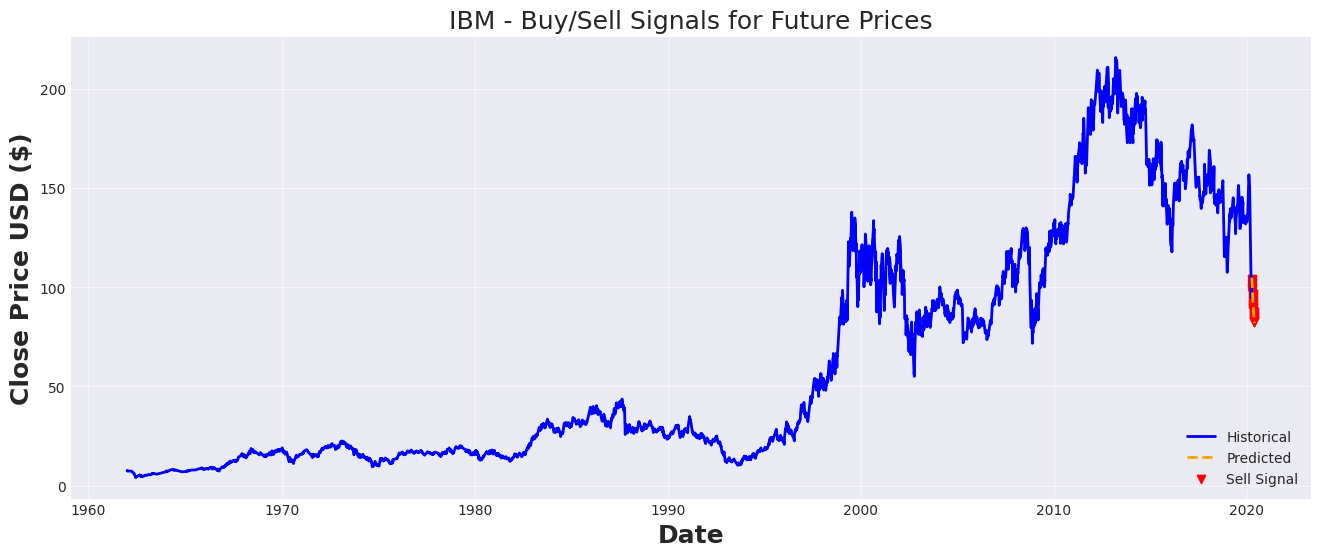

In [288]:
def identify_buy_sell_signals(company, model, scaler, close_data, days_to_predict):
    # Get the last 60 days of data
    last_60_days = close_data[-60:].values
    scaled_data = scaler.transform(last_60_days)

    # Predict future prices
    predictions = []
    input_data = scaled_data
    for _ in range(days_to_predict):
        x_input = np.reshape(input_data, (1, input_data.shape[0], 1))
        predicted_price = model.predict(x_input)
        predictions.append(predicted_price[0][0])
        input_data = np.append(input_data[1:], predicted_price, axis=0)

    # Inverse transform the predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Generate future dates
    last_date = close_data.index[-1]
    future_dates = [last_date + timedelta(days=i) for i in range(1, days_to_predict + 1)]

    # Generate buy/sell signals
    signals = []
    for i in range(1, len(predictions)):
        if predictions[i] > predictions[i - 1]:  # Price going up -> Buy signal
            signals.append('Buy')
        elif predictions[i] < predictions[i - 1]:  # Price going down -> Sell signal
            signals.append('Sell')
        else:
            signals.append('Hold')  # No change -> Hold signal

    # Plot the predictions with Buy/Sell signals
    plt.figure(figsize=(16, 6))
    plt.title(f'{company} - Buy/Sell Signals for Future Prices', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(close_data.index, close_data['Close'], label='Historical', color='blue')
    plt.plot(future_dates, predictions, label='Predicted', linestyle='--', color='orange')

    # Mark Buy/Sell signals on the plot
    for i in range(1, len(signals)):
        if signals[i] == 'Buy':
            plt.scatter(future_dates[i], predictions[i], marker='^', color='green', label='Buy Signal' if i == 1 else "")
        elif signals[i] == 'Sell':
            plt.scatter(future_dates[i], predictions[i], marker='v', color='red', label='Sell Signal' if i == 1 else "")

    plt.legend(loc='lower right')
    plt.show()

# User input for Buy/Sell signals
company = input("Enter the company name (Amazon, Microsoft, IBM): ")
if company not in companies:
    print("Invalid company. Please choose from the listed companies.")
else:
    try:
        days_to_predict = int(input("Enter the number of future days for prediction: "))
        if days_to_predict <= 0:
            print("Number of days must be greater than 0.")
        else:
            company_data = stock[stock['Company'] == company]
            close_data = company_data.filter(['Close'])
            identify_buy_sell_signals(company, model, scaler, close_data, days_to_predict)
    except ValueError:
        print("Invalid input for number of days. Please enter a positive integer.")

## Risk Assessment

In [289]:
def assess_risk(company, model, scaler, close_data, days_to_predict):
    # Get the last 60 days of data
    last_60_days = close_data[-60:].values
    scaled_data = scaler.transform(last_60_days)

    # Predict future prices
    predictions = []
    input_data = scaled_data
    for _ in range(days_to_predict):
        x_input = np.reshape(input_data, (1, input_data.shape[0], 1))
        predicted_price = model.predict(x_input)
        predictions.append(predicted_price[0][0])
        input_data = np.append(input_data[1:], predicted_price, axis=0)

    # Inverse transform the predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Calculate the standard deviation of the predicted prices (volatility)
    price_std_dev = np.std(predictions)

    # Risk categorization
    avg_price = np.mean(predictions)
    risk_percentage = (price_std_dev / avg_price) * 100

    if risk_percentage < 1:
        risk_category = 'Low Risk'
    elif 1 <= risk_percentage <= 5:
        risk_category = 'Medium Risk'
    else:
        risk_category = 'High Risk'

    print(f"\nRisk Assessment for {company}:")
    print(f"Predicted Price Volatility: {price_std_dev:.2f}")
    print(f"Risk Category: {risk_category} ({risk_percentage:.2f}% volatility)")

# User input for Risk Management
company = input("Enter the company name (Amazon, Microsoft, IBM): ")
if company not in companies:
    print("Invalid company. Please choose from the listed companies.")
else:
    try:
        days_to_predict = int(input("Enter the number of future days for prediction: "))
        if days_to_predict <= 0:
            print("Number of days must be greater than 0.")
        else:
            company_data = stock[stock['Company'] == company]
            close_data = company_data.filter(['Close'])
            assess_risk(company, model, scaler, close_data, days_to_predict)
    except ValueError:
        print("Invalid input for number of days. Please enter a positive integer.")


Enter the company name (Amazon, Microsoft, IBM):  Amazon
Enter the number of future days for prediction:  50


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

## Next Day Prediction

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error
from datetime import timedelta

# Sample function to get the prediction and recommendation for the next day
def predict_next_day(company, model, scaler, close_data):
    # Take the last 60 days of data for prediction
    last_60_days = close_data[-60:].values
    scaled_data = scaler.transform(last_60_days)

    # Reshape the input for the model
    x_input = np.reshape(scaled_data, (1, scaled_data.shape[0], 1))

    # Predict the next day's price
    predicted_price = model.predict(x_input)
    predicted_price = scaler.inverse_transform(predicted_price)

    # Get the last actual price
    actual_price = close_data['Close'].iloc[-1]

    # Calculate the predicted change
    price_change = predicted_price[0][0] - actual_price

    # Confidence Level (the higher the difference between predicted and actual, the less confident)
    confidence = 100 - abs(price_change) / actual_price * 100

    # Make a recommendation based on the predicted price movement
    recommendation = ""
    if price_change > 0:
        recommendation = "Buy"
    elif price_change < 0:
        recommendation = "Sell"
    else:
        recommendation = "Hold"

    return predicted_price[0][0], confidence, recommendation

def plot_prediction(company, close_data, predicted_price):
    # Plotting the actual data and predicted price for the next day
    plt.figure(figsize=(16, 6))
    plt.title(f'{company} - Stock Price Prediction for Next Day', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)

    plt.plot(close_data.index, close_data['Close'], label='Historical', color='blue')
    plt.axvline(x=close_data.index[-1], color='gray', linestyle='--')  # Line showing prediction point
    plt.scatter(close_data.index[-1] + timedelta(days=1), predicted_price, color='red', label='Predicted Next Day')
    
    plt.legend(loc='lower right')
    plt.show()

# Function to get user input for prediction
def get_user_input_and_predict():
    company = input("Enter the company name (Amazon, Microsoft, IBM): ")
    if company not in companies:
        print("Invalid company. Please choose from the listed companies.")
    else:
        company_data = stock[stock['Company'] == company]
        close_data = company_data.filter(['Close'])

        # Get prediction for the next day
        predicted_price, confidence, recommendation = predict_next_day(company, model, scaler, close_data)

        print(f"\nPrediction for {company}:")
        print(f"Predicted price for the next day: ${predicted_price:.2f}")
        print(f"Confidence Level: {confidence:.2f}%")
        print(f"Recommendation: {recommendation}")
        
        # Plot the prediction for the next day
        plot_prediction(company, close_data, predicted_price)

# Sample companies for input
companies = ['Amazon', 'Microsoft', 'IBM']

# Assuming `model` and `scaler` are already trained and initialized
# This function will ask the user to enter a company and provide predictions accordingly
get_user_input_and_predict()

Enter the company name (Amazon, Microsoft, IBM):  Microsoft


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Prediction for Microsoft:
Predicted price for the next day: $149.99
Confidence Level: 98.61%
Recommendation: Sell
